# Classification
Salah satu metode hal yang bisa dilakukan oleh AI adalah Classification.
classification mengkatagorikan output dalam bentuk biner atau pun non-biner.
Klasifikasi dapat menanganai masalah output dalam bentuk kategori. Berikut adalah macam klasifikasi:
* binary classification -> melakukan klasifikasi secara biner (0 atau 1)
* multi-class classification -> melakukan klasifikasi non-biner (0 atau 1 atau 2 atau 3 atau ...)
* multi-label classification -> melakukan klasifikasi non-biner akan tetapi outputnya bisa banyak (0, 2, 1 atau 0, 1 atau 0, 3, 2, 1)


## binnary vs multi-class
Terdapat beberapa perbedaan arsitektur model dari neural network binnary dan multi-classs. berikut adalah standart perbedaannya.


| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| Input layer shape | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Same as binary classification |
| Output activation | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) |
| Loss function | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) in TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Same as binary classification |

hal diatas didapatkan dari buku: Typical architecture of a classification network. Source: Adapted from page 295 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)


## let's get started

In [1]:
import datetime
print(datetime.datetime.today())

2023-09-18 04:55:45.407105


### import library

In [2]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs
from sklearn.datasets import make_multilabel_classification

## Code

### Dummy dataset

In [5]:
# Jumlah Sample
sample = 1000

# Buat circle
X_circle, y_circle = make_circles(n_samples= sample,
                    noise= 0.05,
                    random_state= 42,
                    )

# buat bloobs
X_bloobs, y_bloobs = make_blobs(n_samples= sample,
                                random_state= 42)

In [6]:
X_Multi_Label, Y_Multi_Label = make_multilabel_classification(
    n_samples= sample,
    n_classes= 3,
    n_features= 2,
    n_labels=2,
    allow_unlabeled=True,
    random_state=42
)

In [7]:
X_Multi_Label.shape, Y_Multi_Label.shape

((1000, 2), (1000, 3))

In [8]:
X_Multi_Label[:10], Y_Multi_Label[:10]

(array([[17., 41.],
        [36., 21.],
        [ 7., 44.],
        [ 2., 52.],
        [10., 51.],
        [22., 24.],
        [32., 32.],
        [19., 39.],
        [16., 28.],
        [27., 18.]]),
 array([[0, 0, 1],
        [0, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 1],
        [0, 0, 0],
        [1, 1, 0],
        [1, 1, 1],
        [0, 0, 0],
        [0, 0, 0]]))

In [9]:
X_circle[:10], y_circle[:10]

(array([[ 0.74220688,  0.24668576],
        [-0.7340323 ,  0.16869164],
        [-0.82985872,  0.22195899],
        [-0.42913559,  0.67223019],
        [ 0.44560223, -0.89493556],
        [-0.46988549,  0.70803745],
        [-0.01604538,  0.80562331],
        [ 0.75962295,  0.15952616],
        [-0.17569191, -0.79983689],
        [-0.11061613,  1.04220747]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [10]:
X_bloobs[:10], y_bloobs[:10]

(array([[-6.59633932, -7.13901457],
        [-6.13753182, -6.58081701],
        [ 5.19820575,  2.04917508],
        [-2.96855852,  8.16444176],
        [-2.76878897,  7.51114318],
        [-6.82261407, -6.61151731],
        [ 5.02007669,  2.58375543],
        [ 5.55620651,  2.31965816],
        [ 4.86379297,  3.33731011],
        [ 5.8463878 ,  1.15623401]]),
 array([2, 2, 1, 0, 0, 2, 1, 1, 1, 1]))

In [11]:
# dataframe
df_circle = pd.DataFrame({'X0': X_circle[:, 0], 'X1': X_circle[:, 1], 'y': y_circle})
df_bloobs = pd.DataFrame({'X0': X_bloobs[:, 0], 'X1': X_bloobs[:, 1], 'y': y_bloobs})


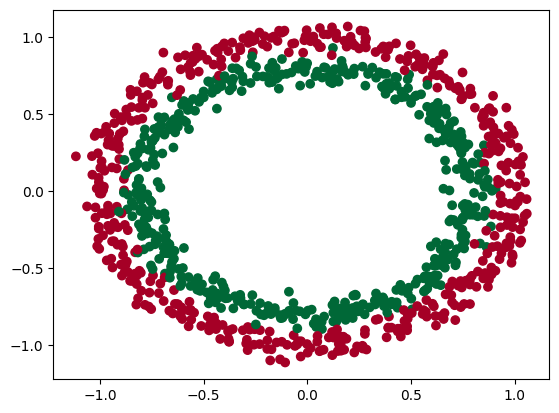

In [12]:
plt.scatter(X_circle[:, 0], X_circle[:, 1], c= y_circle, cmap= plt.cm.RdYlGn)

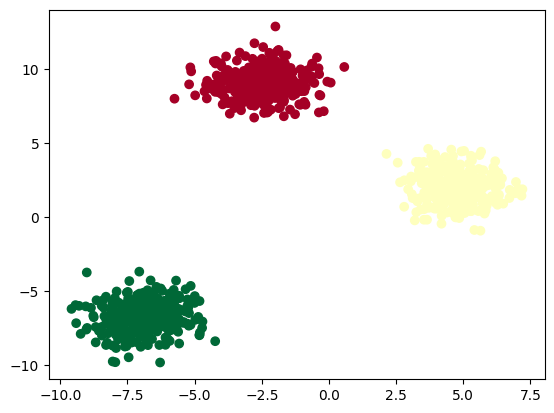

In [13]:
plt.scatter(X_bloobs[:, 0], X_bloobs[:, 1], c= y_bloobs, cmap= plt.cm.RdYlGn)

<ipython-input-14-e3f2527e3d8b>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_Multi_Label[:, 0], X_Multi_Label[:, 1], c= Y_Multi_Label, cmap= plt.cm.BuPu_r)


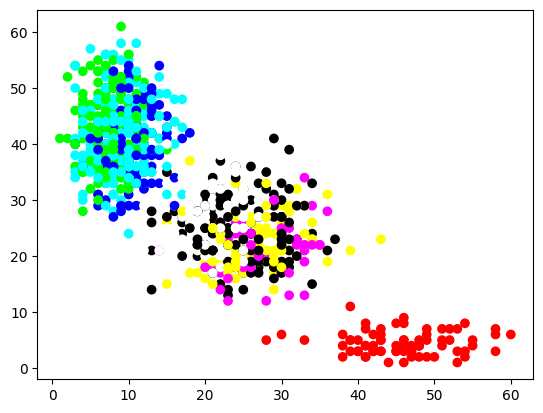

In [14]:
plt.scatter(X_Multi_Label[:, 0], X_Multi_Label[:, 1], c= Y_Multi_Label, cmap= plt.cm.BuPu_r)

## Buat model
telah dipelajari untuk membuat model dan meningkatkan model pada materi regressi sebelumnya, saatnya latihan, latihan, latihan.
sebagai pengingat, berikut adalah cara untuk performa dari model:
![various options you can use to improve a neural network model](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-improving-a-model-from-model-perspective.png)


In [15]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(150),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

model_1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics= [tf.keras.metrics.Accuracy()]
                )

model_1.fit(X_circle, y_circle, epochs= 10, verbose= 1)

Epoch 1/10
32/32 [==============================] - 2s 5ms/step - loss: 2.6782 - accuracy: 0.0000e+00
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 0.8788 - accuracy: 0.0000e+00
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 0.7730 - accuracy: 0.0000e+00
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 0.7210 - accuracy: 0.0000e+00
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 0.7035 - accuracy: 0.0000e+00
Epoch 6/10
32/32 [==============================] - 0s 8ms/step - loss: 0.6967 - accuracy: 0.0000e+00
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6947 - accuracy: 0.0000e+00
Epoch 8/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6940 - accuracy: 0.0000e+00
Epoch 9/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6939 - accuracy: 0.0000e+00
Epoch 10/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6940 - 

In [16]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(150),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

model_1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics= [tf.keras.metrics.BinaryAccuracy(name="binary_accuracy", dtype=None, threshold=0.5)]
                )

model_1.fit(X_circle, y_circle, epochs= 10, verbose= 1)

Epoch 1/10
32/32 [==============================] - 2s 7ms/step - loss: 2.3895 - binary_accuracy: 0.4680
Epoch 2/10
32/32 [==============================] - 0s 5ms/step - loss: 0.7107 - binary_accuracy: 0.5080
Epoch 3/10
32/32 [==============================] - 0s 7ms/step - loss: 0.6963 - binary_accuracy: 0.5020
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6986 - binary_accuracy: 0.5180
Epoch 5/10
32/32 [==============================] - 0s 5ms/step - loss: 0.7008 - binary_accuracy: 0.5330
Epoch 6/10
32/32 [==============================] - 0s 5ms/step - loss: 0.7107 - binary_accuracy: 0.4660
Epoch 7/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6998 - binary_accuracy: 0.4960
Epoch 8/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6948 - binary_accuracy: 0.5210
Epoch 9/10
32/32 [==============================] - 0s 6ms/step - loss: 0.7017 - binary_accuracy: 0.4910
Epoch 10/10
32/32 [==============================] - 0s

Perhatikan setiap fungsi yang digunakan, terlihat diatas menggunakan matrics akurasi saja membuat model kebingungan. sehingga digunakan binnaryAccuracy. Hal ini dikarenakan, metode akurasinya tidak didefinisikan.

In [17]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 3s 7ms/step
doing binary classifcation...


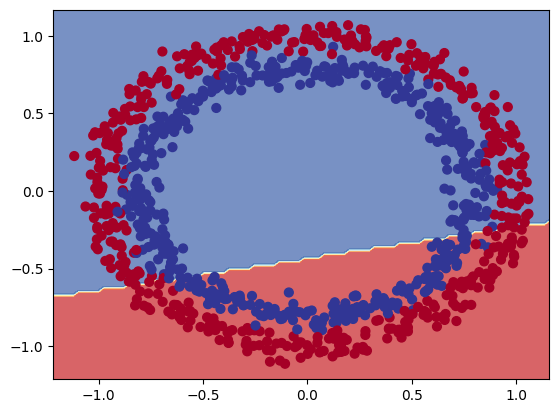

In [18]:
plot_decision_boundary(model_1, X_circle, y_circle)

Bagaimana jika kita menambahkan jumlah layer dan menyesuaikan layer

In [19]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

model_1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics= [tf.keras.metrics.BinaryAccuracy(name="binary_accuracy", dtype=None, threshold=0.5)]
                )

model_1.fit(X_circle, y_circle, epochs= 10, verbose= 1)

Epoch 1/10
32/32 [==============================] - 2s 6ms/step - loss: 0.7045 - binary_accuracy: 0.4950
Epoch 2/10
32/32 [==============================] - 0s 7ms/step - loss: 0.7095 - binary_accuracy: 0.5030
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 0.7128 - binary_accuracy: 0.4750
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 0.7003 - binary_accuracy: 0.5220
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 0.7034 - binary_accuracy: 0.4910
Epoch 6/10
32/32 [==============================] - 0s 6ms/step - loss: 0.7237 - binary_accuracy: 0.4830
Epoch 7/10
32/32 [==============================] - 0s 5ms/step - loss: 0.7135 - binary_accuracy: 0.4920
Epoch 8/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6975 - binary_accuracy: 0.5070
Epoch 9/10
32/32 [==============================] - 0s 7ms/step - loss: 0.7011 - binary_accuracy: 0.5110
Epoch 10/10
32/32 [==============================] - 0s

313/313 [==============================] - 1s 4ms/step
doing binary classifcation...


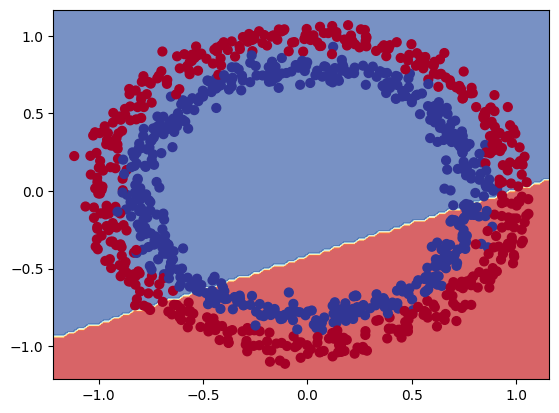

In [20]:
plot_decision_boundary(model_1, X_circle, y_circle)

Hal ini dikarenakan pada kasus model diatas menggunakan kasus regeresi, yang mana melakukan klasifikasi dari garis lurus.

## binnary & categorical classification
untuk mendefinisikan pekerjaan model yang harus dikerjakan, berada pada bagian layer dengan menambahkan activation

> Note: Jangan menggunakan model yang telah dilatih sebelumnya untuk mencoba model baru, hasilnya akan berbeda

In [21]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

model_3.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(),
                metrics= [tf.keras.metrics.binary_accuracy])

model_3.fit(X_circle, y_circle, epochs=10, verbose= 1)

Epoch 1/10
32/32 [==============================] - 2s 5ms/step - loss: 4.5218 - binary_accuracy: 0.4800
Epoch 2/10
32/32 [==============================] - 0s 6ms/step - loss: 4.4698 - binary_accuracy: 0.4770
Epoch 3/10
32/32 [==============================] - 0s 7ms/step - loss: 4.4315 - binary_accuracy: 0.4760
Epoch 4/10
32/32 [==============================] - 0s 7ms/step - loss: 4.4004 - binary_accuracy: 0.4730
Epoch 5/10
32/32 [==============================] - 0s 7ms/step - loss: 4.3862 - binary_accuracy: 0.4730
Epoch 6/10
32/32 [==============================] - 0s 10ms/step - loss: 4.3778 - binary_accuracy: 0.4720
Epoch 7/10
32/32 [==============================] - 0s 8ms/step - loss: 4.3556 - binary_accuracy: 0.4720
Epoch 8/10
32/32 [==============================] - 0s 6ms/step - loss: 4.3471 - binary_accuracy: 0.4730
Epoch 9/10
32/32 [==============================] - 0s 6ms/step - loss: 4.3424 - binary_accuracy: 0.4720
Epoch 10/10
32/32 [==============================] - 0

313/313 [==============================] - 2s 5ms/step
doing binary classifcation...


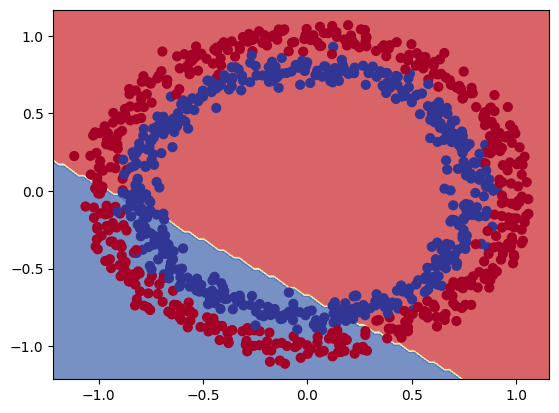

In [22]:
plot_decision_boundary(model_3, X_circle, y_circle)

In [23]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation= 'relu'),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(),
                metrics= [tf.keras.metrics.binary_accuracy])

model_4.fit(X_circle, y_circle, epochs=10, verbose= 1)

Epoch 1/10
32/32 [==============================] - 2s 4ms/step - loss: 1.2110 - binary_accuracy: 0.4960
Epoch 2/10
32/32 [==============================] - 0s 5ms/step - loss: 0.7905 - binary_accuracy: 0.3460
Epoch 3/10
32/32 [==============================] - 0s 7ms/step - loss: 0.7671 - binary_accuracy: 0.3180
Epoch 4/10
32/32 [==============================] - 0s 7ms/step - loss: 0.7572 - binary_accuracy: 0.2560
Epoch 5/10
32/32 [==============================] - 0s 5ms/step - loss: 0.7505 - binary_accuracy: 0.2920
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 0.7445 - binary_accuracy: 0.3000
Epoch 7/10
32/32 [==============================] - 0s 5ms/step - loss: 0.7385 - binary_accuracy: 0.2320
Epoch 8/10
32/32 [==============================] - 0s 7ms/step - loss: 0.7331 - binary_accuracy: 0.2760
Epoch 9/10
32/32 [==============================] - 0s 8ms/step - loss: 0.7259 - binary_accuracy: 0.3460
Epoch 10/10
32/32 [==============================] - 0s

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


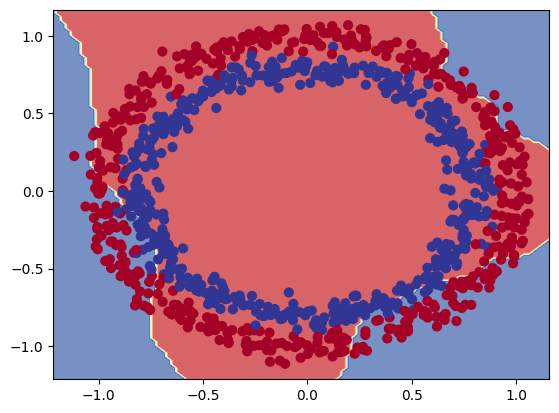

In [24]:
plot_decision_boundary(model_4, X_circle, y_circle)

hhmmm... Terlihat dengan ditambahkan layer, model mulai dapat membentuk pola untuk membedakan data.

### Perlebar Layer
Mari coba perlebar layer

In [25]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation= "relu"),
    tf.keras.layers.Dense(50, activation= "relu"),
    tf.keras.layers.Dense(50, activation= "relu"),
    tf.keras.layers.Dense(1)
])

model_5.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(),
                metrics= [tf.keras.metrics.binary_accuracy])

model_5.fit(X_circle, y_circle, epochs=10, verbose= 1)

Epoch 1/10
32/32 [==============================] - 1s 4ms/step - loss: 1.6935 - binary_accuracy: 0.4760
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 0.7812 - binary_accuracy: 0.3400
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7615 - binary_accuracy: 0.3380
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 0.7516 - binary_accuracy: 0.2720
Epoch 5/10
32/32 [==============================] - 0s 5ms/step - loss: 0.7421 - binary_accuracy: 0.3490
Epoch 6/10
32/32 [==============================] - 0s 5ms/step - loss: 0.7301 - binary_accuracy: 0.3970
Epoch 7/10
32/32 [==============================] - 0s 5ms/step - loss: 0.7190 - binary_accuracy: 0.3630
Epoch 8/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6988 - binary_accuracy: 0.4570
Epoch 9/10
32/32 [==============================] - 0s 4ms/step - loss: 0.6737 - binary_accuracy: 0.5530
Epoch 10/10
32/32 [==============================] - 0s

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


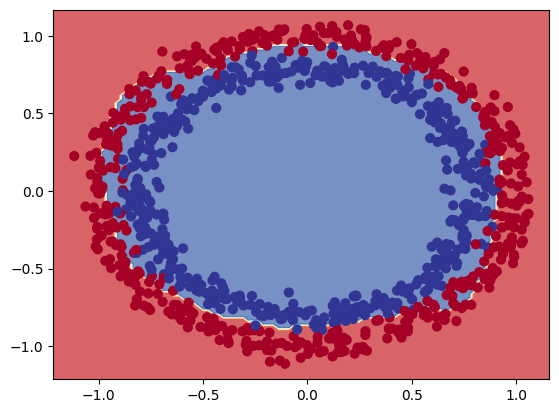

In [26]:
plot_decision_boundary(model_5, X_circle, y_circle)

In [27]:
tf.random.set_seed(42)

model_5_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation= "relu"),
    tf.keras.layers.Dense(50, activation= "relu"),
    tf.keras.layers.Dense(50, activation= "relu"),
    tf.keras.layers.Dense(1)
])

model_5_1.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(),
                metrics= [tf.keras.metrics.binary_accuracy])

model_5_1.fit(X_circle, y_circle, epochs=10, verbose= 1)

Epoch 1/10
32/32 [==============================] - 1s 3ms/step - loss: 1.4184 - binary_accuracy: 0.4890
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7696 - binary_accuracy: 0.0990
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7603 - binary_accuracy: 0.3970
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7523 - binary_accuracy: 0.2500
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7428 - binary_accuracy: 0.3330
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7279 - binary_accuracy: 0.4050
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7149 - binary_accuracy: 0.3960
Epoch 8/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6880 - binary_accuracy: 0.5180
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6579 - binary_accuracy: 0.6120
Epoch 10/10
32/32 [==============================] - 0s

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


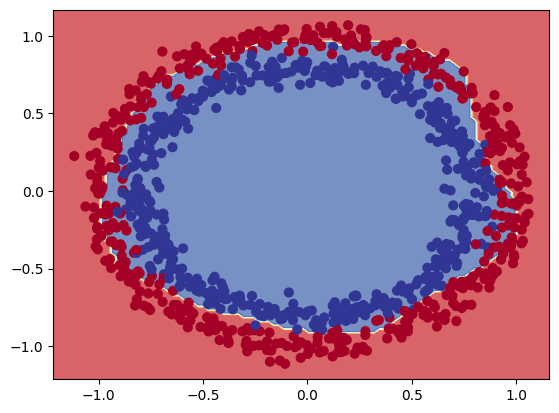

In [28]:
plot_decision_boundary(model_5_1, X_circle, y_circle)

In [29]:
tf.random.set_seed(42)

model_5_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation= "relu"),
    tf.keras.layers.Dense(50, activation= "relu"),
    tf.keras.layers.Dense(50, activation= "relu"),
    tf.keras.layers.Dense(1)
])

model_5_2.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(),
                metrics= [tf.keras.metrics.binary_accuracy])

model_5_2.fit(X_circle, y_circle, epochs=10, verbose= 1)

Epoch 1/10
32/32 [==============================] - 1s 3ms/step - loss: 2.3521 - binary_accuracy: 0.4630
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7826 - binary_accuracy: 0.3520
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7583 - binary_accuracy: 0.3330
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7460 - binary_accuracy: 0.2390
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7366 - binary_accuracy: 0.3740
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7257 - binary_accuracy: 0.4140
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7156 - binary_accuracy: 0.3520
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6974 - binary_accuracy: 0.4810
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6737 - binary_accuracy: 0.5520
Epoch 10/10
32/32 [==============================] - 0s

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


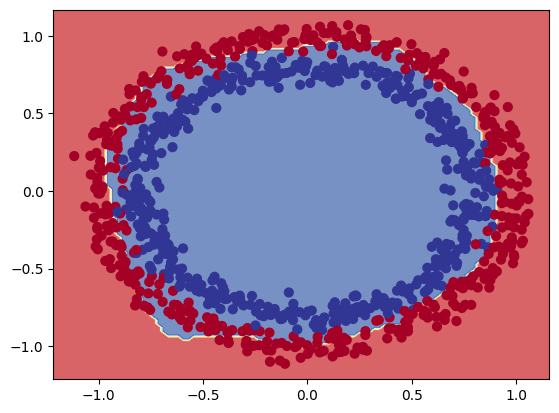

In [30]:
plot_decision_boundary(model_5_2, X_circle, y_circle)

Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - binary_accuracy: 0.5000
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - binary_accuracy: 0.5000
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - binary_accuracy: 0.5000
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - binary_accuracy: 0.5000
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - binary_accuracy: 0.5000
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - binary_accuracy: 0.5000
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - binary_accuracy: 0.5000
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - binary_accuracy: 0.5000
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - binary_accuracy: 0.5000
Epoch 10/10
313/313 [==============================] - 

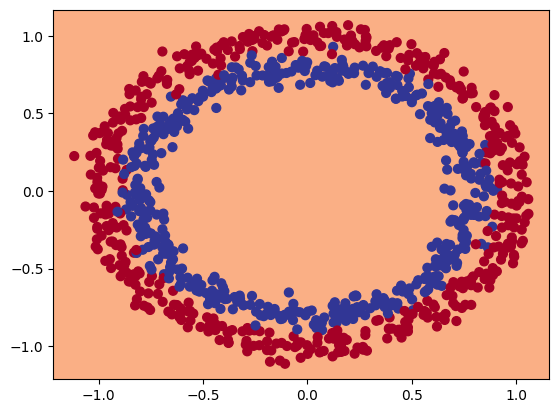

In [31]:
tf.random.set_seed(42)

model_5_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation= "relu"),
    tf.keras.layers.Dense(50, activation= "relu"),
    tf.keras.layers.Dense(50, activation= "relu"),
    tf.keras.layers.Dense(1)
])

model_5_3.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(),
                metrics= [tf.keras.metrics.binary_accuracy])

model_5_3.fit(X_circle, y_circle, epochs=10, verbose= 1)
plot_decision_boundary(model_5_3, X_circle, y_circle)

Epoch 1/10
32/32 [==============================] - 1s 3ms/step - loss: 1.2927 - binary_accuracy: 0.4880
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7761 - binary_accuracy: 0.2640
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7638 - binary_accuracy: 0.3210
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7581 - binary_accuracy: 0.2460
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7509 - binary_accuracy: 0.3040
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 0.7409 - binary_accuracy: 0.4160
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7336 - binary_accuracy: 0.2680
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7206 - binary_accuracy: 0.3720
Epoch 9/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7052 - binary_accuracy: 0.4380
Epoch 10/10
313/313 [==============================] - 

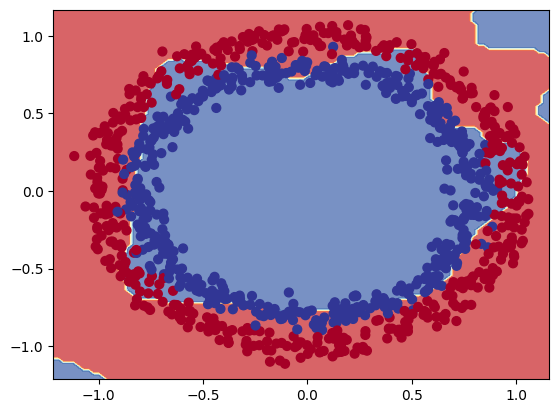

In [32]:
tf.random.set_seed(42)

model_5_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation= "relu"),
    tf.keras.layers.Dense(50, activation= "relu"),
    tf.keras.layers.Dense(50, activation= "relu"),
    tf.keras.layers.Dense(1)
])

model_5_4.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(),
                metrics= [tf.keras.metrics.binary_accuracy])

model_5_4.fit(X_circle, y_circle, epochs=10, verbose= 1)
plot_decision_boundary(model_5_4, X_circle, y_circle)

Epoch 1/10
32/32 [==============================] - 1s 3ms/step - loss: 1.4430 - binary_accuracy: 0.4980
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7884 - binary_accuracy: 0.3310
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7630 - binary_accuracy: 0.3400
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7558 - binary_accuracy: 0.2450
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7454 - binary_accuracy: 0.3190
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7299 - binary_accuracy: 0.4070
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7154 - binary_accuracy: 0.4180
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6871 - binary_accuracy: 0.5210
Epoch 9/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6571 - binary_accuracy: 0.6490
Epoch 10/10
313/313 [==============================] - 

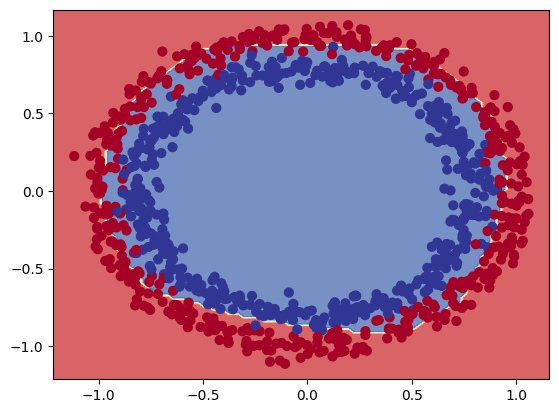

In [33]:
tf.random.set_seed(42)

model_5_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation= "relu"),
    tf.keras.layers.Dense(50, activation= "relu"),
    tf.keras.layers.Dense(50, activation= "relu"),
    tf.keras.layers.Dense(1)
])

model_5_5.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(),
                metrics= [tf.keras.metrics.binary_accuracy])

model_5_5.fit(X_circle, y_circle, epochs=10, verbose= 1)
plot_decision_boundary(model_5_5, X_circle, y_circle)

Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: 1.2630 - binary_accuracy: 0.4450
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7803 - binary_accuracy: 0.3280
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7642 - binary_accuracy: 0.3530
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7558 - binary_accuracy: 0.2260
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7475 - binary_accuracy: 0.3500
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7348 - binary_accuracy: 0.3890
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7252 - binary_accuracy: 0.3230
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7068 - binary_accuracy: 0.4640
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6817 - binary_accuracy: 0.5310
Epoch 10/10
313/313 [==============================] - 

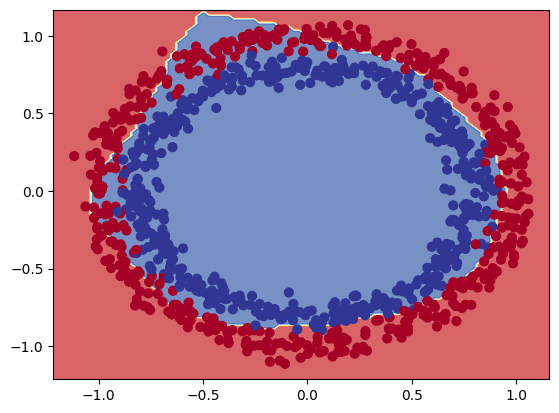

In [34]:
tf.random.set_seed(42)

model_5_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation= "relu"),
    tf.keras.layers.Dense(50, activation= "relu"),
    tf.keras.layers.Dense(50, activation= "relu"),
    tf.keras.layers.Dense(1)
])

model_5_6.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(),
                metrics= [tf.keras.metrics.binary_accuracy])

model_5_6.fit(X_circle, y_circle, epochs=10, verbose= 1)
plot_decision_boundary(model_5_6, X_circle, y_circle)

Epoch 1/10
32/32 [==============================] - 1s 3ms/step - loss: 0.8393 - binary_accuracy: 0.3030
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7707 - binary_accuracy: 0.2700
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7503 - binary_accuracy: 0.3620
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7321 - binary_accuracy: 0.3410
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7071 - binary_accuracy: 0.4500
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6732 - binary_accuracy: 0.5430
Epoch 7/10
32/32 [==============================] - 0s 14ms/step - loss: 0.6197 - binary_accuracy: 0.6870
Epoch 8/10
32/32 [==============================] - 0s 3ms/step - loss: 0.5268 - binary_accuracy: 0.7820
Epoch 9/10
32/32 [==============================] - 0s 3ms/step - loss: 0.3746 - binary_accuracy: 0.9040
Epoch 10/10
313/313 [==============================] -

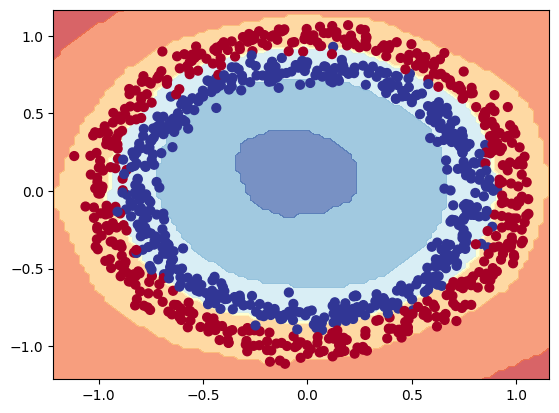

In [35]:
tf.random.set_seed(42)

model_5_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation= "relu"),
    tf.keras.layers.Dense(50, activation= "relu"),
    tf.keras.layers.Dense(50, activation= "relu"),
    tf.keras.layers.Dense(1)
])

model_5_7.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(),
                metrics= [tf.keras.metrics.binary_accuracy])

model_5_7.fit(X_circle, y_circle, epochs=10, verbose= 1)
plot_decision_boundary(model_5_7, X_circle, y_circle)

Hhhmm... melakukan perlebaran layer memberikan hasil yang tidak konsisten. apakah ini berlaku untuk semua kasus perubahan paramter?

### persempit layer
Mari coba dengan mempersempit layer

In [36]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation= "relu"),
    tf.keras.layers.Dense(8, activation= "relu"),
    tf.keras.layers.Dense(8, activation= "relu"),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(),
                metrics= [tf.keras.metrics.binary_accuracy])

model_6.fit(X_circle, y_circle, epochs=10, verbose= 1)

Epoch 1/10
32/32 [==============================] - 1s 3ms/step - loss: 7.7125 - binary_accuracy: 0.5000
Epoch 2/10
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - binary_accuracy: 0.5000
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - binary_accuracy: 0.5000
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - binary_accuracy: 0.5000
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - binary_accuracy: 0.5000
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - binary_accuracy: 0.5000
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - binary_accuracy: 0.5000
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - binary_accuracy: 0.5000
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - binary_accuracy: 0.5000
Epoch 10/10
32/32 [==============================] - 0s

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


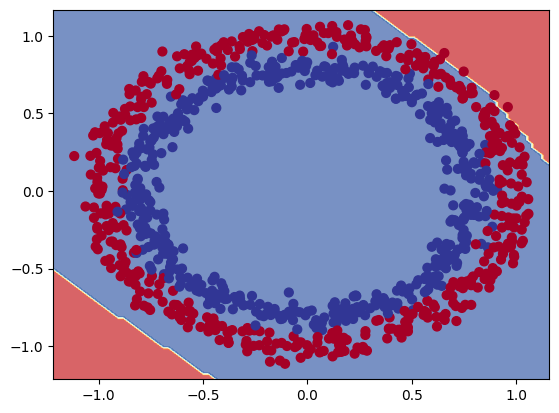

In [37]:
plot_decision_boundary(model_6, X_circle, y_circle)

Terlihat bahwasanya setiap paramter yang di tetapkan sangat mempengaruhi pengklasifikasian model

Epoch 1/10
32/32 [==============================] - 1s 4ms/step - loss: 2.5072 - binary_accuracy: 0.5000
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.9953 - binary_accuracy: 0.4830
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.8313 - binary_accuracy: 0.4200
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 0.8034 - binary_accuracy: 0.4270
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7868 - binary_accuracy: 0.4340
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7745 - binary_accuracy: 0.4140
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7654 - binary_accuracy: 0.3930
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7575 - binary_accuracy: 0.3920
Epoch 9/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7512 - binary_accuracy: 0.3970
Epoch 10/10
313/313 [==============================] - 

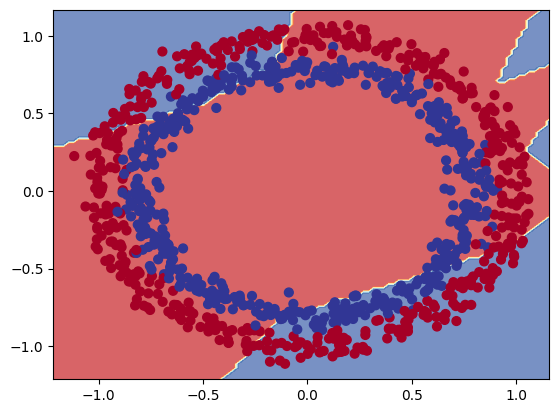

In [38]:
tf.random.set_seed(42)

model_6_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation= "relu"),
    tf.keras.layers.Dense(4, activation= "relu"),
    tf.keras.layers.Dense(4, activation= "relu"),
    tf.keras.layers.Dense(1)
])

model_6_1.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(),
                metrics= [tf.keras.metrics.binary_accuracy])

model_6_1.fit(X_circle, y_circle, epochs=10, verbose= 1)
plot_decision_boundary(model_6_1, X_circle, y_circle)

Epoch 1/10
32/32 [==============================] - 2s 3ms/step - loss: 1.8256 - binary_accuracy: 0.5000
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 1.3732 - binary_accuracy: 0.5000
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 1.1978 - binary_accuracy: 0.5000
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 1.0741 - binary_accuracy: 0.5000
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 0.9730 - binary_accuracy: 0.5000
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 0.8970 - binary_accuracy: 0.5000
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.8457 - binary_accuracy: 0.4950
Epoch 8/10
32/32 [==============================] - 0s 3ms/step - loss: 0.8112 - binary_accuracy: 0.4230
Epoch 9/10
32/32 [==============================] - 0s 4ms/step - loss: 0.7854 - binary_accuracy: 0.4600
Epoch 10/10
313/313 [==============================] - 

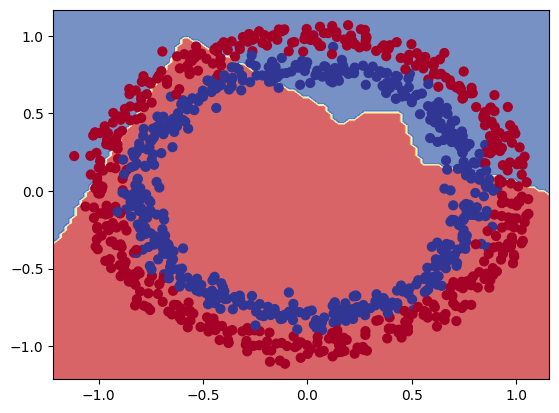

In [39]:
tf.random.set_seed(42)

model_6_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation= "relu"),
    tf.keras.layers.Dense(5, activation= "relu"),
    tf.keras.layers.Dense(5, activation= "relu"),
    tf.keras.layers.Dense(1)
])

model_6_2.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(),
                metrics= [tf.keras.metrics.binary_accuracy])

model_6_2.fit(X_circle, y_circle, epochs=10, verbose= 1)
plot_decision_boundary(model_6_2, X_circle, y_circle)

Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: 1.9938 - binary_accuracy: 0.4930
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.8932 - binary_accuracy: 0.4100
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.8339 - binary_accuracy: 0.4000
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7946 - binary_accuracy: 0.3700
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7682 - binary_accuracy: 0.3740
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7511 - binary_accuracy: 0.3750
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7430 - binary_accuracy: 0.2820
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7353 - binary_accuracy: 0.3260
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7289 - binary_accuracy: 0.3090
Epoch 10/10
313/313 [==============================] - 

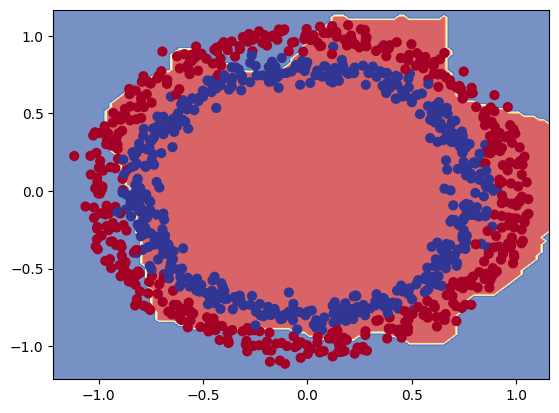

In [40]:
tf.random.set_seed(42)

model_6_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation= "relu"),
    tf.keras.layers.Dense(20, activation= "relu"),
    tf.keras.layers.Dense(20, activation= "relu"),
    tf.keras.layers.Dense(1)
])

model_6_3.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(),
                metrics= [tf.keras.metrics.binary_accuracy])

model_6_3.fit(X_circle, y_circle, epochs=10, verbose= 1)
plot_decision_boundary(model_6_3, X_circle, y_circle)

### Penambahan epoch
Mari coba penambahan epoch

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.9639 - binary_accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 3.5851 - binary_accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 3.2304 - binary_accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 2.2232 - binary_accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0312 - binary_accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9374 - binary_accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8808 - binary_accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8363 - binary_accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8049 - binary_accuracy: 0.4900
Epoch 10/100
32/32 [==========================

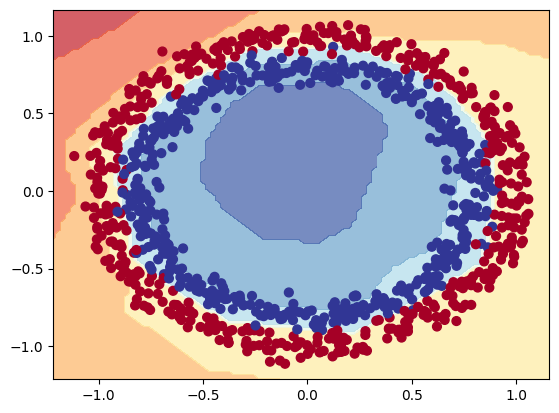

In [41]:
tf.random.set_seed(42)

model_7_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation= "relu"),
    tf.keras.layers.Dense(8, activation= "relu"),
    tf.keras.layers.Dense(8, activation= "relu"),
    tf.keras.layers.Dense(1)
])

model_7_1.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(),
                metrics= [tf.keras.metrics.binary_accuracy])

model_7_1.fit(X_circle, y_circle, epochs=100, verbose= 1)
plot_decision_boundary(model_7_1, X_circle, y_circle)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.4501 - binary_accuracy: 0.4600
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9904 - binary_accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8547 - binary_accuracy: 0.4550
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8002 - binary_accuracy: 0.4490
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7739 - binary_accuracy: 0.3950
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7571 - binary_accuracy: 0.3920
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7460 - binary_accuracy: 0.4170
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7382 - binary_accuracy: 0.4060
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7308 - binary_accuracy: 0.3960
Epoch 10/100
32/32 [==========================

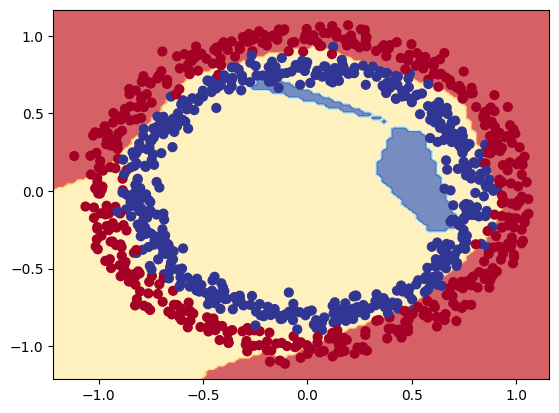

In [42]:
tf.random.set_seed(42)

model_7_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation= "relu"),
    tf.keras.layers.Dense(4, activation= "relu"),
    tf.keras.layers.Dense(4, activation= "relu"),
    tf.keras.layers.Dense(1)
])

model_7_2.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(),
                metrics= [tf.keras.metrics.binary_accuracy])

model_7_2.fit(X_circle, y_circle, epochs=100, verbose= 1)
plot_decision_boundary(model_7_2, X_circle, y_circle)

### Activation
Coba tambah sigmoid activation pada output

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.6915 - binary_accuracy: 0.4900
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6910 - binary_accuracy: 0.5070
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6904 - binary_accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6902 - binary_accuracy: 0.5120
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6899 - binary_accuracy: 0.5120
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6897 - binary_accuracy: 0.5140
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6892 - binary_accuracy: 0.5210
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6889 - binary_accuracy: 0.5380
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6886 - binary_accuracy: 0.5300
Epoch 10/100
32/32 [==========================

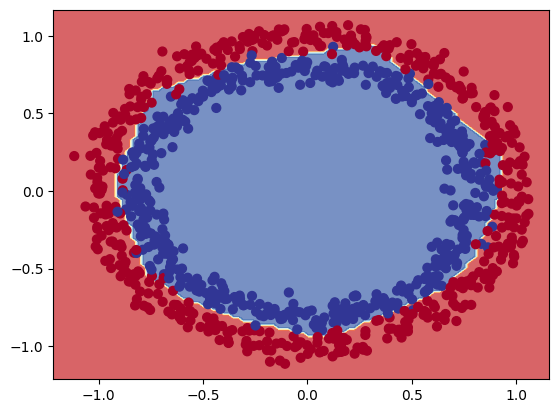

In [43]:
tf.random.set_seed(42)

model_8_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation= "relu"),
    tf.keras.layers.Dense(4, activation= "relu"),
    tf.keras.layers.Dense(4, activation= "relu"),
    tf.keras.layers.Dense(1, activation= "sigmoid" )
])

model_8_1.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(),
                metrics= [tf.keras.metrics.binary_accuracy])

model_8_1.fit(X_circle, y_circle, epochs=100, verbose= 1)
plot_decision_boundary(model_8_1, X_circle, y_circle)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.6911 - binary_accuracy: 0.5040
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6901 - binary_accuracy: 0.5110
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6890 - binary_accuracy: 0.5150
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6880 - binary_accuracy: 0.5150
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6868 - binary_accuracy: 0.5180
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6854 - binary_accuracy: 0.5240
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6833 - binary_accuracy: 0.5240
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6811 - binary_accuracy: 0.5310
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6780 - binary_accuracy: 0.5440
Epoch 10/100
32/32 [==========================

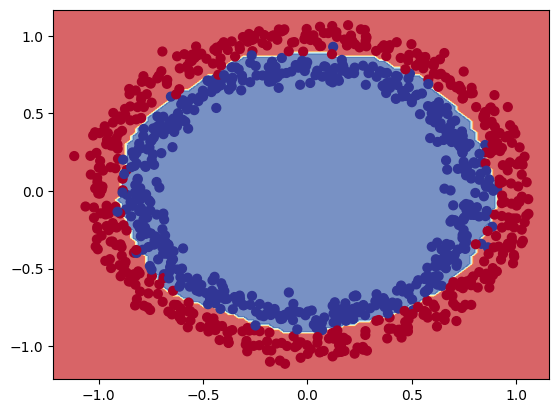

In [44]:
tf.random.set_seed(42)

model_8_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation= "relu"),
    tf.keras.layers.Dense(8, activation= "relu"),
    tf.keras.layers.Dense(8, activation= "relu"),
    tf.keras.layers.Dense(1, activation= "sigmoid" )
])

model_8_2.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(),
                metrics= [tf.keras.metrics.binary_accuracy])

model_8_2.fit(X_circle, y_circle, epochs=100, verbose= 1)
plot_decision_boundary(model_8_2, X_circle, y_circle)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6918 - binary_accuracy: 0.5090
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6891 - binary_accuracy: 0.5180
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6865 - binary_accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6844 - binary_accuracy: 0.5130
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6814 - binary_accuracy: 0.5140
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6781 - binary_accuracy: 0.5170
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6742 - binary_accuracy: 0.5560
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6705 - binary_accuracy: 0.5610
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6653 - binary_accuracy: 0.5710
Epoch 10/100
32/32 [==========================

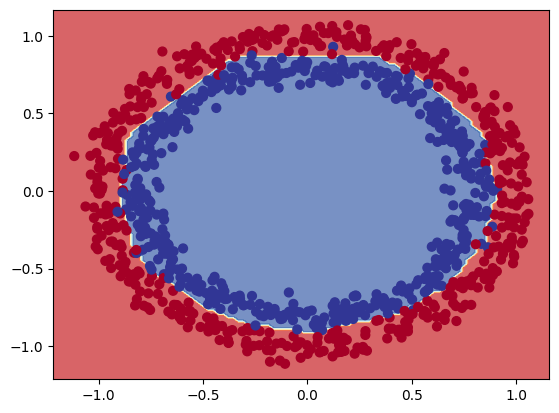

In [45]:
tf.random.set_seed(42)

model_8_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation= "relu"),
    tf.keras.layers.Dense(10, activation= "relu"),
    tf.keras.layers.Dense(10, activation= "relu"),
    tf.keras.layers.Dense(1, activation= "sigmoid" )
])

model_8_3.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(),
                metrics= [tf.keras.metrics.binary_accuracy])

model_8_3.fit(X_circle, y_circle, epochs=100, verbose= 1)
plot_decision_boundary(model_8_3, X_circle, y_circle)

Sepertinya hal yang terjadi pada kasus diatas (50%) dapat diatasi dengan menambahkan activation sigmoid. Terdapat beberapa hal yang telah diterapkan:
* `activation` : Diterapkan relu dan sigmoid activation. activation ini berguna untuk memberikan threshold pada pengklasifikasian, sehingga hal ini yang memberikan perbedaan pada regresi dan klasifikasi.
* `Learning rate` : pada learning rate yang digunakan adalah Adam (sejuah ini, Adam sering optimal digunakan di berbagai kasus), defaultnya 0.001.
  * learning rate ini mengidentifikasikan seberapa cepat model belajar. semakin tinggi learningrate semakin cepat dia belajar. Akan tetapi semakin cepat dia belajar, memiliki kemungikinan bahwasanya model tidak mempelajari apa-apa. terdapat trick untuk mencari learning rate yang
* `epoch` : model melakukan pembejalaran setiap epoch untuk mencari pola. sehingga epoch dan learning rate memiliki keterhubungan seberapa cepat mempelajari suatu pola dan seberapa optimal.


## Evaluasi model
Melihat performa model, perlu dilakukan pengujian dengan data yang belum pernah dilatih *(ground truth)*. Maka dari itu, untuk mendapatan data yang belum pernah dilatih, data dapat dibagi menjadi data training, data testing, dan data validasi (optional).

In [46]:
X_circle.shape, y_circle.shape

((1000, 2), (1000,))

In [47]:
X_train, y_train = X_circle[:900], y_circle[:900]
X_test, y_test = X_circle[900:],y_circle[900:]

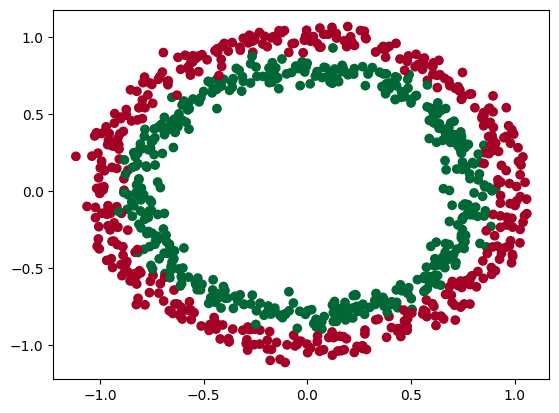

In [48]:
plt.scatter(X_train[:, 0], X_train[:, 1], c= y_train, cmap= plt.cm.RdYlGn)

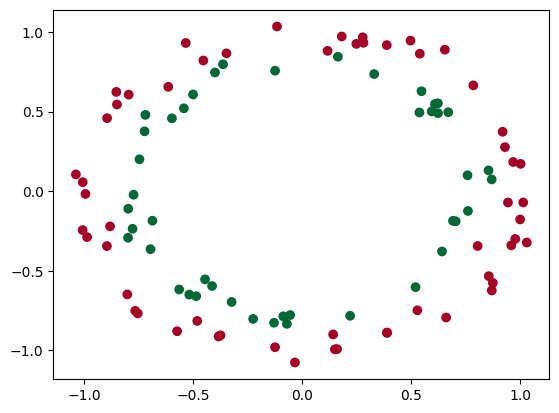

In [49]:
plt.scatter(X_test[:, 0], X_test[:, 1], c= y_test, cmap= plt.cm.RdYlGn)

Mari coba dengan model yang telah dibuat sebelumnya

Epoch 1/100
29/29 [==============================] - 1s 3ms/step - loss: 0.6934 - binary_accuracy: 0.4611
Epoch 2/100
29/29 [==============================] - 0s 4ms/step - loss: 0.6930 - binary_accuracy: 0.5044
Epoch 3/100
29/29 [==============================] - 0s 4ms/step - loss: 0.6927 - binary_accuracy: 0.5089
Epoch 4/100
29/29 [==============================] - 0s 4ms/step - loss: 0.6924 - binary_accuracy: 0.5122
Epoch 5/100
29/29 [==============================] - 0s 5ms/step - loss: 0.6922 - binary_accuracy: 0.5211
Epoch 6/100
29/29 [==============================] - 0s 4ms/step - loss: 0.6920 - binary_accuracy: 0.5256
Epoch 7/100
29/29 [==============================] - 0s 5ms/step - loss: 0.6914 - binary_accuracy: 0.5311
Epoch 8/100
29/29 [==============================] - 0s 4ms/step - loss: 0.6908 - binary_accuracy: 0.5244
Epoch 9/100
29/29 [==============================] - 0s 4ms/step - loss: 0.6899 - binary_accuracy: 0.5278
Epoch 10/100
29/29 [==========================

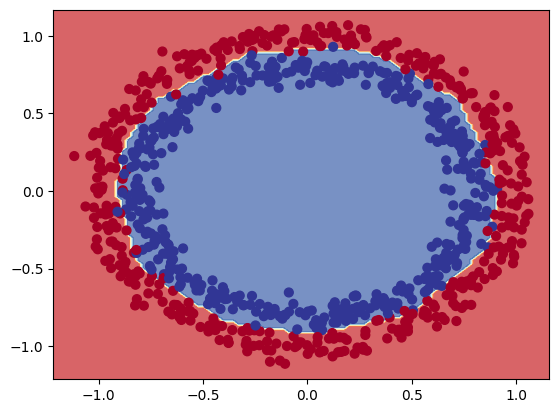

In [50]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation= "relu"),
    tf.keras.layers.Dense(8, activation= "relu"),
    tf.keras.layers.Dense(8, activation= "relu"),
    tf.keras.layers.Dense(1, activation= "sigmoid" )
])

model_9.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(),
                metrics= [tf.keras.metrics.binary_accuracy])

model_9.fit(X_train, y_train, epochs=100, verbose= 1)
plot_decision_boundary(model_9, X_train, y_train)

In [51]:
model_9.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.1069 - binary_accuracy: 0.9700


[0.10689998418092728, 0.9700000286102295]

In [52]:
loss, akurasi = model_9.evaluate(X_test, y_test)
print("loss pada data test :", loss)
print("akurasi pada data test:", akurasi)

4/4 [==============================] - 0s 3ms/step - loss: 0.1069 - binary_accuracy: 0.9700
loss pada data test : 0.10689998418092728
akurasi pada data test: 0.9700000286102295


313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


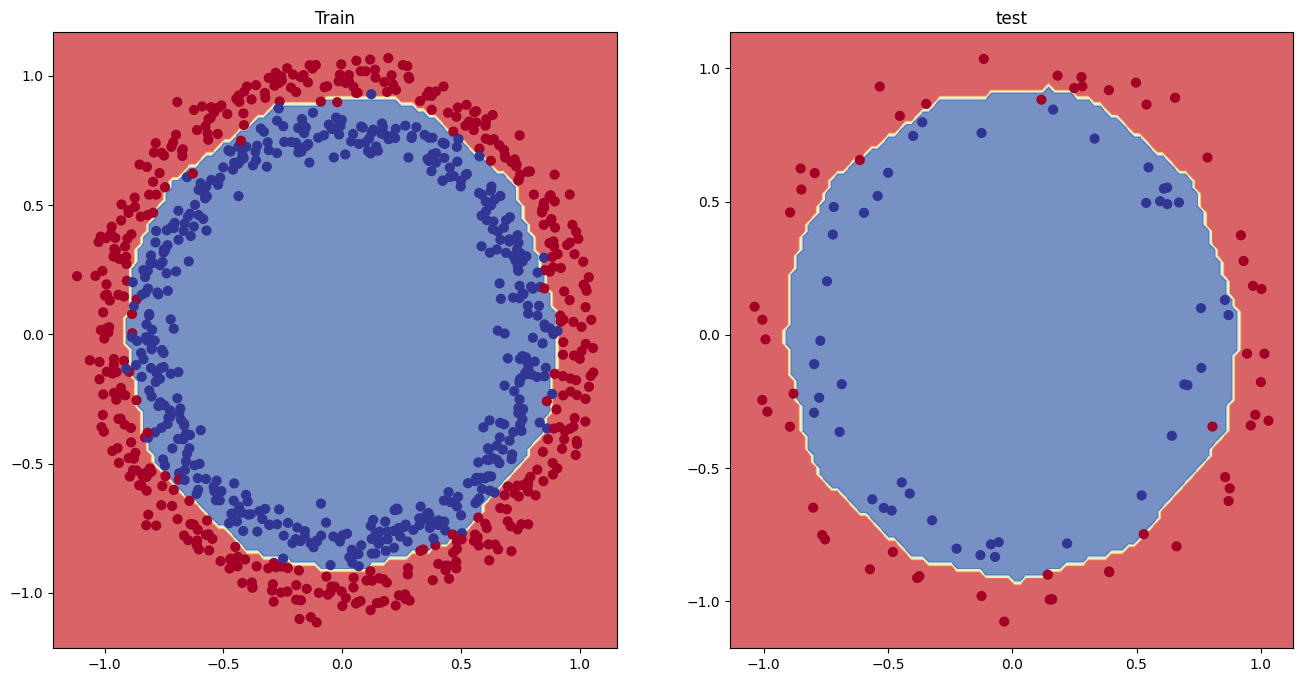

In [53]:
plt.figure(figsize= (16, 8))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_9, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_9, X_test, y_test)

Terlihat bahwa model dapat melakukan klasifikasi dengan baik.

## visualisasi loss
Saat melakukan training, terdapat performa yang terus berubah. performa tersebut dapat disimpan didalam suatu variable disaat melakukan training. Mari simpan didalam variable **history**.

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


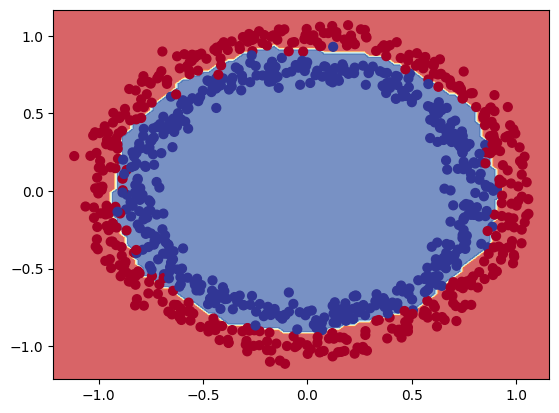

In [54]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation= "relu"),
    tf.keras.layers.Dense(8, activation= "relu"),
    tf.keras.layers.Dense(8, activation= "relu"),
    tf.keras.layers.Dense(1, activation= "sigmoid" )
])

model_10.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(0.01),
                metrics= [tf.keras.metrics.binary_accuracy])

history = model_10.fit(X_train, y_train, epochs=100, verbose= 0)
plot_decision_boundary(model_10, X_train, y_train)

In [55]:
model_10.evaluate(X_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.1295 - binary_accuracy: 0.9500


[0.12953492999076843, 0.949999988079071]

In [56]:
history.history

{'loss': [0.7043772339820862,
  0.6919993162155151,
  0.6848211884498596,
  0.6587068438529968,
  0.5735213160514832,
  0.4100513756275177,
  0.30283915996551514,
  0.22558437287807465,
  0.15780480206012726,
  0.16770845651626587,
  0.122044138610363,
  0.1151411160826683,
  0.14109855890274048,
  0.12574169039726257,
  0.10375506430864334,
  0.11614882946014404,
  0.10516650229692459,
  0.16842935979366302,
  0.10765877366065979,
  0.08909165859222412,
  0.09573604166507721,
  0.1130523607134819,
  0.15657557547092438,
  0.12390743941068649,
  0.09863992780447006,
  0.16560865938663483,
  0.11309003829956055,
  0.08185283839702606,
  0.09716050326824188,
  0.11709599941968918,
  0.08520961552858353,
  0.07816753536462784,
  0.0988369956612587,
  0.08462061733007431,
  0.07910820841789246,
  0.08619078248739243,
  0.0750991478562355,
  0.0801742747426033,
  0.09626759588718414,
  0.09884852916002274,
  0.11398825794458389,
  0.08468406647443771,
  0.0988738164305687,
  0.0800426900386

In [57]:
pd.DataFrame(history.history)

,loss,binary_accuracy
0,0.704377,0.473333
1,0.691999,0.535556
2,0.684821,0.601111
3,0.658707,0.676667
4,0.573521,0.825556
...,...,...
95,0.107088,0.958889
96,0.112848,0.960000
97,0.069606,0.971111
98,0.102935,0.964444


Text(0.5, 1.0, 'performa model 10')

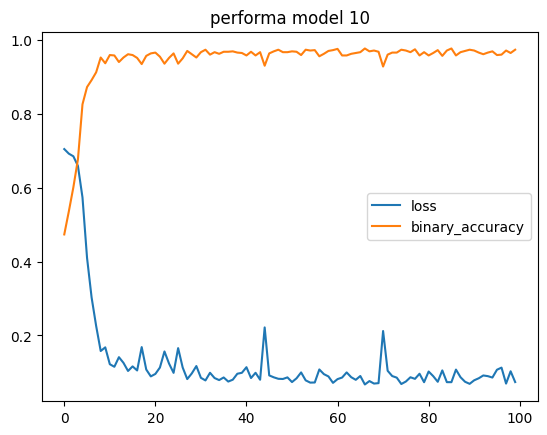

In [58]:
pd.DataFrame(history.history).plot()
plt.title("performa model 10")

semakin kecil loss, semakin dekat model untuk memprediksi data ground truth.

## Mencari learning rate terbaik

pada learning rate sebelumnya, merupakan untung-untungan tebakannya benar. Terdapat teknik yang mana learning rate dapat berganti seiring pertambahannya epoch. Melakukan hal ini, tensorflow telah memberikan trick dengan menggunakan method `callback`. method ini dapat dipanggil disaat pembentukan model.

Epoch 1/100
29/29 [==============================] - 1s 2ms/step - loss: 0.6990 - binary_accuracy: 0.5078 - lr: 1.0000e-05
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 0.6990 - binary_accuracy: 0.5056 - lr: 1.1220e-05
Epoch 3/100
29/29 [==============================] - 0s 3ms/step - loss: 0.6989 - binary_accuracy: 0.5022 - lr: 1.2589e-05
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 0.6989 - binary_accuracy: 0.5067 - lr: 1.4125e-05
Epoch 5/100
29/29 [==============================] - 0s 4ms/step - loss: 0.6988 - binary_accuracy: 0.5044 - lr: 1.5849e-05
Epoch 6/100
29/29 [==============================] - 0s 4ms/step - loss: 0.6987 - binary_accuracy: 0.5078 - lr: 1.7783e-05
Epoch 7/100
29/29 [==============================] - 0s 4ms/step - loss: 0.6986 - binary_accuracy: 0.5056 - lr: 1.9953e-05
Epoch 8/100
29/29 [==============================] - 0s 4ms/step - loss: 0.6985 - binary_accuracy: 0.5067 - lr: 2.2387e-05
Epoch 9/100
29/2

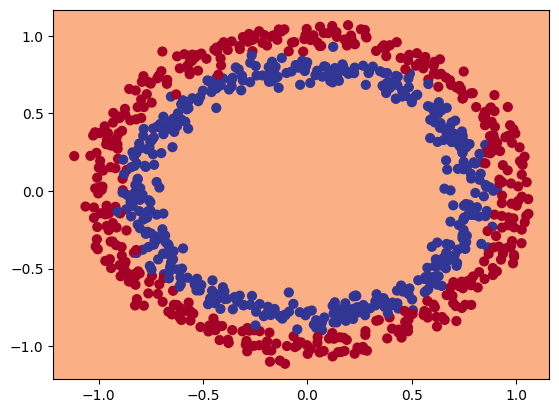

In [59]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation= "relu"),
    tf.keras.layers.Dense(8, activation= "relu"),
    tf.keras.layers.Dense(8, activation= "relu"),
    tf.keras.layers.Dense(1, activation= "sigmoid" )
])

model_11.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(0.01),
                metrics= [tf.keras.metrics.binary_accuracy])

lr_schaduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-5 * 10**(epoch/20)) # Dari learning rate 0.00001 akan terus meningkat seiring pertambahannya epoch

history = model_11.fit(X_train, y_train, epochs=100, verbose= 1, callbacks= lr_schaduler)
plot_decision_boundary(model_11, X_train, y_train)

eehh... walaupun sebelumnya learningrate-nya telah didefinisikan. learningrate yang dipakai tetap menggunakan learningrate dari callback

<Axes: xlabel='epoch'>

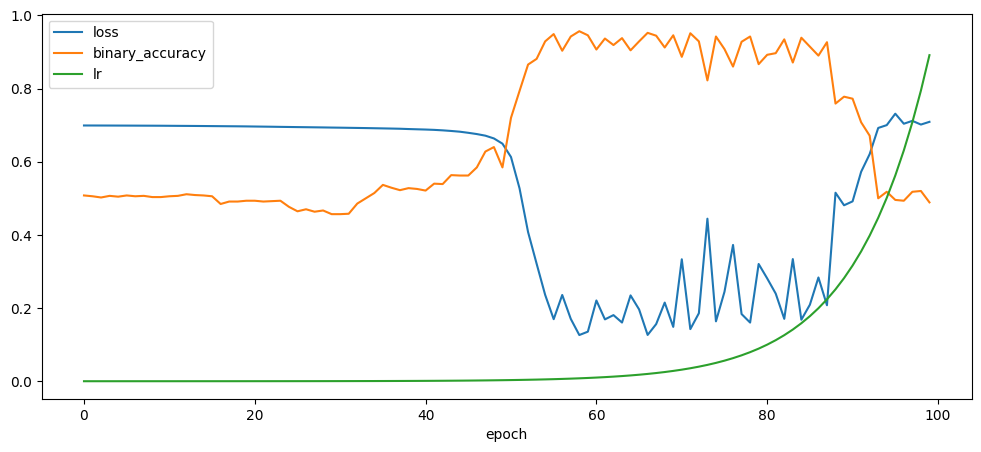

In [60]:
pd.DataFrame(history.history).plot(figsize= (12, 5), xlabel= "epoch")

Pada grafik diatas terlihat perubahan learningrate sangat mempengaruhi performa model.
> Untuk melihat learningrate yang diterapkan pada setiap epcoh, dapat menggunakan **log-scale** para learning rate

Text(0.5, 1.0, 'Learning rate vs loss')

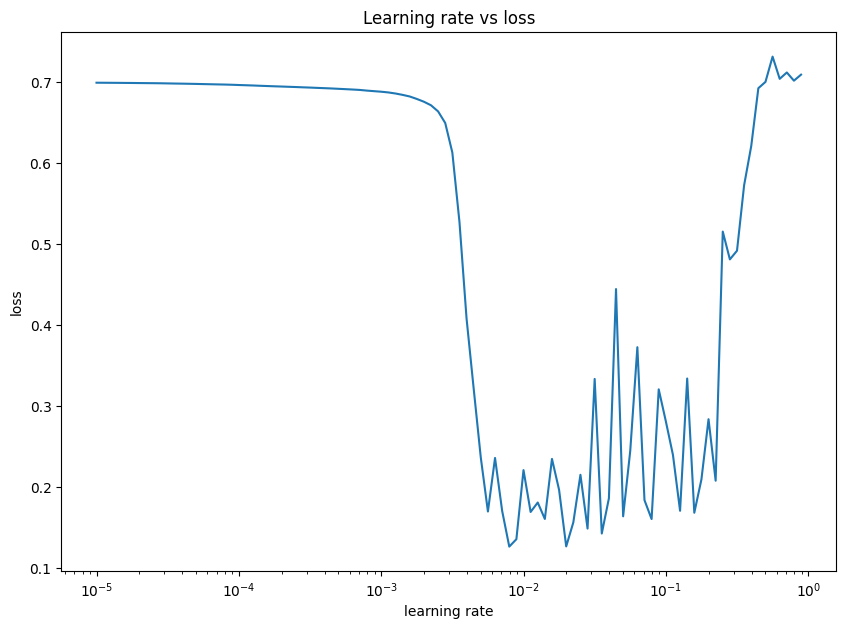

In [61]:
# plot perbandingan learningrate dengan loss
learning_rate_schedule= 1e-5 * 10**(np.arange(100)/20)
plt.figure(figsize= (10, 7))
plt.semilogx(learning_rate_schedule, history.history["loss"]) # Dengan demikan learningrate akan diterapkan log-scale
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("Learning rate vs loss")


Terlihat bahwasanya learningrate yang menghasilkan loss terendah terletak pada sekitar 0.01. learningrate yang ideal terletak pada sebelum titik terendah loss.

![finding the ideal learning rate by plotting learning rate vs. loss](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-learning-rate-vs-loss.png)

maka dengan hal ini dikarenakan learning rate terendah yang didapatkan adalah `0.01` maka akan digunakan learning rate `0.005`.

Epoch 1/20
29/29 [==============================] - 1s 2ms/step - loss: 0.6885 - binary_accuracy: 0.5200
Epoch 2/20
29/29 [==============================] - 0s 3ms/step - loss: 0.6822 - binary_accuracy: 0.5844
Epoch 3/20
29/29 [==============================] - 0s 3ms/step - loss: 0.6766 - binary_accuracy: 0.5656
Epoch 4/20
29/29 [==============================] - 0s 2ms/step - loss: 0.6668 - binary_accuracy: 0.5956
Epoch 5/20
29/29 [==============================] - 0s 3ms/step - loss: 0.6486 - binary_accuracy: 0.6267
Epoch 6/20
29/29 [==============================] - 0s 3ms/step - loss: 0.6083 - binary_accuracy: 0.7144
Epoch 7/20
29/29 [==============================] - 0s 3ms/step - loss: 0.5166 - binary_accuracy: 0.8444
Epoch 8/20
29/29 [==============================] - 0s 4ms/step - loss: 0.3986 - binary_accuracy: 0.8844
Epoch 9/20
29/29 [==============================] - 0s 5ms/step - loss: 0.2850 - binary_accuracy: 0.9400
Epoch 10/20
29/29 [==============================] - 0s

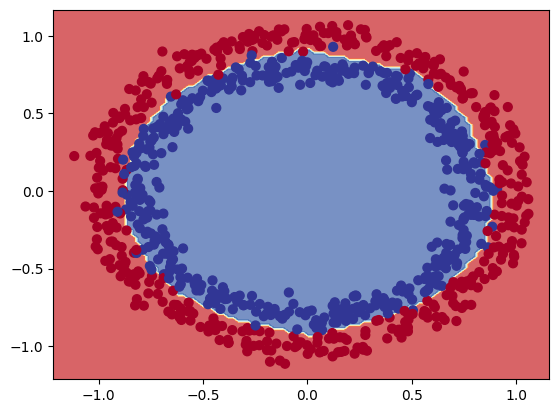

In [62]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation= "relu"),
    tf.keras.layers.Dense(8, activation= "relu"),
    tf.keras.layers.Dense(8, activation= "relu"),
    tf.keras.layers.Dense(1, activation= "sigmoid" )
])

model_12.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(0.005),
                metrics= [tf.keras.metrics.binary_accuracy])


history = model_12.fit(X_train, y_train, epochs=20, verbose= 1) # learningrate akan mempercepat proses training, sehingga epoch dapat di perkecil
plot_decision_boundary(model_12, X_train, y_train)

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


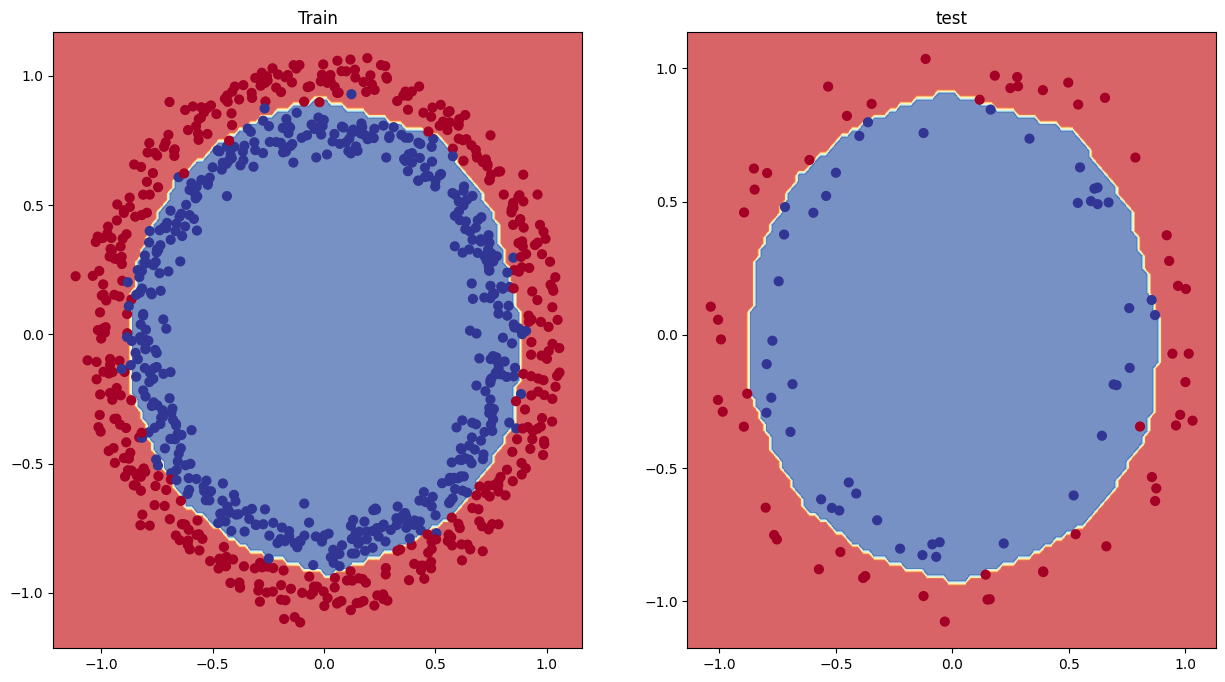

In [63]:
plt.figure(figsize = (15, 8))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_12, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_12, X_test, y_test)

In [64]:
model_12.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_94 (Dense)            (None, 8)                 24        
                                                                 
 dense_95 (Dense)            (None, 8)                 72        
                                                                 
 dense_96 (Dense)            (None, 8)                 72        
                                                                 
 dense_97 (Dense)            (None, 1)                 9         
                                                                 
Total params: 177 (708.00 Byte)
Trainable params: 177 (708.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Confusion Matrix
Menggunakan confussion matrix untuk evaluasi model. confussion matrix metode lain untuk evaluasi.

## Multi-Label Classification
Coba untuk mengklasifikasikan kasus multi-label

In [65]:
X_train, Y_train = X_Multi_Label[:900], Y_Multi_Label[:900]
X_test, Y_test = X_Multi_Label[900:], Y_Multi_Label[900:]

In [66]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation= "relu"),
    tf.keras.layers.Dense(3, activation= "sigmoid" )
])

model_13.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(),
                metrics= [tf.keras.metrics.binary_accuracy])


model_13.fit(X_train, Y_train, epochs=10, verbose= 1)

Epoch 1/10
29/29 [==============================] - 1s 2ms/step - loss: 2.2831 - binary_accuracy: 0.6341
Epoch 2/10
29/29 [==============================] - 0s 2ms/step - loss: 1.6118 - binary_accuracy: 0.6996
Epoch 3/10
29/29 [==============================] - 0s 3ms/step - loss: 1.1051 - binary_accuracy: 0.7067
Epoch 4/10
29/29 [==============================] - 0s 2ms/step - loss: 0.6862 - binary_accuracy: 0.7007
Epoch 5/10
29/29 [==============================] - 0s 3ms/step - loss: 0.5565 - binary_accuracy: 0.7096
Epoch 6/10
29/29 [==============================] - 0s 2ms/step - loss: 0.5355 - binary_accuracy: 0.7178
Epoch 7/10
29/29 [==============================] - 0s 2ms/step - loss: 0.5231 - binary_accuracy: 0.7185
Epoch 8/10
29/29 [==============================] - 0s 3ms/step - loss: 0.5189 - binary_accuracy: 0.7181
Epoch 9/10
29/29 [==============================] - 0s 2ms/step - loss: 0.5159 - binary_accuracy: 0.7248
Epoch 10/10
29/29 [==============================] - 0s

In [67]:
tf.random.set_seed(42)

model_13_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation= "ELU"),
    tf.keras.layers.Dense(3, activation= "sigmoid" )
])

model_13_1.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(),
                metrics= [tf.keras.metrics.binary_accuracy])


model_13_1.fit(X_train, Y_train, epochs=10, verbose= 1)

Epoch 1/10
29/29 [==============================] - 1s 3ms/step - loss: 6.4933 - binary_accuracy: 0.5704
Epoch 2/10
29/29 [==============================] - 0s 3ms/step - loss: 4.6090 - binary_accuracy: 0.5704
Epoch 3/10
29/29 [==============================] - 0s 3ms/step - loss: 2.8080 - binary_accuracy: 0.5648
Epoch 4/10
29/29 [==============================] - 0s 3ms/step - loss: 1.6265 - binary_accuracy: 0.5589
Epoch 5/10
29/29 [==============================] - 0s 3ms/step - loss: 1.1514 - binary_accuracy: 0.5956
Epoch 6/10
29/29 [==============================] - 0s 3ms/step - loss: 0.9126 - binary_accuracy: 0.6552
Epoch 7/10
29/29 [==============================] - 0s 3ms/step - loss: 0.7650 - binary_accuracy: 0.6826
Epoch 8/10
29/29 [==============================] - 0s 3ms/step - loss: 0.6650 - binary_accuracy: 0.6859
Epoch 9/10
29/29 [==============================] - 0s 3ms/step - loss: 0.6038 - binary_accuracy: 0.7067
Epoch 10/10
29/29 [==============================] - 0s

In [68]:
tf.random.set_seed(42)

model_13_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation= "relu"),
    tf.keras.layers.Dense(3, activation= "sigmoid" )
])

model_13_2.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(),
                metrics= [tf.keras.metrics.binary_accuracy])


model_13_2.fit(X_train, Y_train, epochs=10, verbose= 1)

Epoch 1/10
29/29 [==============================] - 1s 3ms/step - loss: 1.8084 - binary_accuracy: 0.6467
Epoch 2/10
29/29 [==============================] - 0s 2ms/step - loss: 0.8956 - binary_accuracy: 0.6807
Epoch 3/10
29/29 [==============================] - 0s 2ms/step - loss: 0.5998 - binary_accuracy: 0.7059
Epoch 4/10
29/29 [==============================] - 0s 2ms/step - loss: 0.5658 - binary_accuracy: 0.7048
Epoch 5/10
29/29 [==============================] - 0s 2ms/step - loss: 0.5551 - binary_accuracy: 0.7119
Epoch 6/10
29/29 [==============================] - 0s 3ms/step - loss: 0.5455 - binary_accuracy: 0.7144
Epoch 7/10
29/29 [==============================] - 0s 2ms/step - loss: 0.5381 - binary_accuracy: 0.7178
Epoch 8/10
29/29 [==============================] - 0s 2ms/step - loss: 0.5319 - binary_accuracy: 0.7122
Epoch 9/10
29/29 [==============================] - 0s 2ms/step - loss: 0.5261 - binary_accuracy: 0.7200
Epoch 10/10
29/29 [==============================] - 0s

In [69]:
tf.random.set_seed(42)

model_13_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation= "Softmax"),
    tf.keras.layers.Dense(3, activation= "sigmoid" )
])

model_13_3.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(),
                metrics= [tf.keras.metrics.binary_accuracy])


model_13_3.fit(X_train, Y_train, epochs=10, verbose= 1)

Epoch 1/10
29/29 [==============================] - 1s 2ms/step - loss: 0.6600 - binary_accuracy: 0.5885
Epoch 2/10
29/29 [==============================] - 0s 2ms/step - loss: 0.6552 - binary_accuracy: 0.5889
Epoch 3/10
29/29 [==============================] - 0s 2ms/step - loss: 0.6490 - binary_accuracy: 0.5985
Epoch 4/10
29/29 [==============================] - 0s 2ms/step - loss: 0.6417 - binary_accuracy: 0.6226
Epoch 5/10
29/29 [==============================] - 0s 2ms/step - loss: 0.6349 - binary_accuracy: 0.6400
Epoch 6/10
29/29 [==============================] - 0s 2ms/step - loss: 0.6288 - binary_accuracy: 0.6656
Epoch 7/10
29/29 [==============================] - 0s 2ms/step - loss: 0.6233 - binary_accuracy: 0.6674
Epoch 8/10
29/29 [==============================] - 0s 2ms/step - loss: 0.6175 - binary_accuracy: 0.6619
Epoch 9/10
29/29 [==============================] - 0s 4ms/step - loss: 0.6105 - binary_accuracy: 0.6859
Epoch 10/10
29/29 [==============================] - 0s

In [70]:
tf.random.set_seed(42)

model_13_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation= "LeakyReLU"),
    tf.keras.layers.Dense(3, activation= "sigmoid" )
])

model_13_4.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(),
                metrics= [tf.keras.metrics.binary_accuracy])


model_13_4.fit(X_train, Y_train, epochs=10, verbose= 1)

Epoch 1/10
29/29 [==============================] - 1s 4ms/step - loss: 1.6902 - binary_accuracy: 0.6096
Epoch 2/10
29/29 [==============================] - 0s 3ms/step - loss: 1.1681 - binary_accuracy: 0.6267
Epoch 3/10
29/29 [==============================] - 0s 3ms/step - loss: 0.8915 - binary_accuracy: 0.6389
Epoch 4/10
29/29 [==============================] - 0s 3ms/step - loss: 0.7080 - binary_accuracy: 0.6533
Epoch 5/10
29/29 [==============================] - 0s 3ms/step - loss: 0.6090 - binary_accuracy: 0.6793
Epoch 6/10
29/29 [==============================] - 0s 3ms/step - loss: 0.5655 - binary_accuracy: 0.7107
Epoch 7/10
29/29 [==============================] - 0s 2ms/step - loss: 0.5473 - binary_accuracy: 0.7233
Epoch 8/10
29/29 [==============================] - 0s 2ms/step - loss: 0.5405 - binary_accuracy: 0.7126
Epoch 9/10
29/29 [==============================] - 0s 2ms/step - loss: 0.5356 - binary_accuracy: 0.7337
Epoch 10/10
29/29 [==============================] - 0s

In [71]:
tf.random.set_seed(42)

model_13_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation= "sigmoid"),
    tf.keras.layers.Dense(3, activation= "sigmoid" )
])

model_13_5.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(),
                metrics= [tf.keras.metrics.binary_accuracy])


model_13_5.fit(X_train, Y_train, epochs=10, verbose= 1)

Epoch 1/10
29/29 [==============================] - 1s 2ms/step - loss: 0.7169 - binary_accuracy: 0.5026
Epoch 2/10
29/29 [==============================] - 0s 2ms/step - loss: 0.6868 - binary_accuracy: 0.5241
Epoch 3/10
29/29 [==============================] - 0s 2ms/step - loss: 0.6628 - binary_accuracy: 0.6344
Epoch 4/10
29/29 [==============================] - 0s 2ms/step - loss: 0.6474 - binary_accuracy: 0.6585
Epoch 5/10
29/29 [==============================] - 0s 2ms/step - loss: 0.6354 - binary_accuracy: 0.6811
Epoch 6/10
29/29 [==============================] - 0s 2ms/step - loss: 0.6155 - binary_accuracy: 0.7196
Epoch 7/10
29/29 [==============================] - 0s 3ms/step - loss: 0.5990 - binary_accuracy: 0.7274
Epoch 8/10
29/29 [==============================] - 0s 2ms/step - loss: 0.5909 - binary_accuracy: 0.7233
Epoch 9/10
29/29 [==============================] - 0s 2ms/step - loss: 0.5854 - binary_accuracy: 0.7196
Epoch 10/10
29/29 [==============================] - 0s

In [72]:
tf.random.set_seed(42)

model_13_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation= "linear"),
    tf.keras.layers.Dense(3, activation= "sigmoid" )
])

model_13_6.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(),
                metrics= [tf.keras.metrics.binary_accuracy])


model_13_6.fit(X_train, Y_train, epochs=10, verbose= 1)

Epoch 1/10
29/29 [==============================] - 1s 2ms/step - loss: 5.2422 - binary_accuracy: 0.4715
Epoch 2/10
29/29 [==============================] - 0s 2ms/step - loss: 2.7011 - binary_accuracy: 0.5500
Epoch 3/10
29/29 [==============================] - 0s 3ms/step - loss: 1.7310 - binary_accuracy: 0.6359
Epoch 4/10
29/29 [==============================] - 0s 3ms/step - loss: 1.2990 - binary_accuracy: 0.6422
Epoch 5/10
29/29 [==============================] - 0s 3ms/step - loss: 0.9757 - binary_accuracy: 0.6370
Epoch 6/10
29/29 [==============================] - 0s 2ms/step - loss: 0.7299 - binary_accuracy: 0.6456
Epoch 7/10
29/29 [==============================] - 0s 2ms/step - loss: 0.6306 - binary_accuracy: 0.6933
Epoch 8/10
29/29 [==============================] - 0s 2ms/step - loss: 0.6116 - binary_accuracy: 0.7093
Epoch 9/10
29/29 [==============================] - 0s 2ms/step - loss: 0.6039 - binary_accuracy: 0.7078
Epoch 10/10
29/29 [==============================] - 0s

Kita pakai leakyRelu. Kemdian kita coba mengganti optimizer

In [73]:
tf.random.set_seed(42)

model_14_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation= "LeakyReLU"),
    tf.keras.layers.Dense(3, activation= "sigmoid" )
])

model_14_1.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adagrad(),
                metrics= [tf.keras.metrics.binary_accuracy])


model_14_1.fit(X_train, Y_train, epochs=10, verbose= 1)

Epoch 1/10
29/29 [==============================] - 1s 2ms/step - loss: 3.7757 - binary_accuracy: 0.4663
Epoch 2/10
29/29 [==============================] - 0s 2ms/step - loss: 3.4699 - binary_accuracy: 0.4656
Epoch 3/10
29/29 [==============================] - 0s 2ms/step - loss: 3.2999 - binary_accuracy: 0.4678
Epoch 4/10
29/29 [==============================] - 0s 2ms/step - loss: 3.1817 - binary_accuracy: 0.4704
Epoch 5/10
29/29 [==============================] - 0s 2ms/step - loss: 3.0826 - binary_accuracy: 0.4496
Epoch 6/10
29/29 [==============================] - 0s 2ms/step - loss: 2.9989 - binary_accuracy: 0.4389
Epoch 7/10
29/29 [==============================] - 0s 2ms/step - loss: 2.9258 - binary_accuracy: 0.4259
Epoch 8/10
29/29 [==============================] - 0s 3ms/step - loss: 2.8606 - binary_accuracy: 0.4196
Epoch 9/10
29/29 [==============================] - 0s 2ms/step - loss: 2.8007 - binary_accuracy: 0.4211
Epoch 10/10
29/29 [==============================] - 0s

In [74]:
tf.random.set_seed(42)

model_14_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation= "LeakyReLU"),
    tf.keras.layers.Dense(3, activation= "sigmoid" )
])

model_14_2.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adadelta(),
                metrics= [tf.keras.metrics.binary_accuracy])


model_14_2.fit(X_train, Y_train, epochs=10, verbose= 1)

Epoch 1/10
29/29 [==============================] - 1s 2ms/step - loss: 2.0905 - binary_accuracy: 0.5956
Epoch 2/10
29/29 [==============================] - 0s 2ms/step - loss: 2.0891 - binary_accuracy: 0.5956
Epoch 3/10
29/29 [==============================] - 0s 2ms/step - loss: 2.0877 - binary_accuracy: 0.5956
Epoch 4/10
29/29 [==============================] - 0s 3ms/step - loss: 2.0862 - binary_accuracy: 0.5956
Epoch 5/10
29/29 [==============================] - 0s 2ms/step - loss: 2.0848 - binary_accuracy: 0.5956
Epoch 6/10
29/29 [==============================] - 0s 2ms/step - loss: 2.0833 - binary_accuracy: 0.5956
Epoch 7/10
29/29 [==============================] - 0s 2ms/step - loss: 2.0818 - binary_accuracy: 0.5956
Epoch 8/10
29/29 [==============================] - 0s 2ms/step - loss: 2.0803 - binary_accuracy: 0.5959
Epoch 9/10
29/29 [==============================] - 0s 3ms/step - loss: 2.0787 - binary_accuracy: 0.5967
Epoch 10/10
29/29 [==============================] - 0s

In [75]:
tf.random.set_seed(42)

model_14_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation= "LeakyReLU"),
    tf.keras.layers.Dense(3, activation= "sigmoid" )
])

model_14_3.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adamax(),
                metrics= [tf.keras.metrics.binary_accuracy])


model_14_3.fit(X_train, Y_train, epochs=10, verbose= 1)

Epoch 1/10
29/29 [==============================] - 1s 2ms/step - loss: 5.8340 - binary_accuracy: 0.4893
Epoch 2/10
29/29 [==============================] - 0s 2ms/step - loss: 4.5603 - binary_accuracy: 0.4893
Epoch 3/10
29/29 [==============================] - 0s 2ms/step - loss: 3.5212 - binary_accuracy: 0.4904
Epoch 4/10
29/29 [==============================] - 0s 2ms/step - loss: 2.8427 - binary_accuracy: 0.5381
Epoch 5/10
29/29 [==============================] - 0s 2ms/step - loss: 2.3362 - binary_accuracy: 0.6219
Epoch 6/10
29/29 [==============================] - 0s 2ms/step - loss: 1.9025 - binary_accuracy: 0.6800
Epoch 7/10
29/29 [==============================] - 0s 2ms/step - loss: 1.5335 - binary_accuracy: 0.6852
Epoch 8/10
29/29 [==============================] - 0s 2ms/step - loss: 1.2530 - binary_accuracy: 0.6948
Epoch 9/10
29/29 [==============================] - 0s 3ms/step - loss: 1.1004 - binary_accuracy: 0.7133
Epoch 10/10
29/29 [==============================] - 0s

In [76]:
tf.random.set_seed(42)

model_14_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation= "LeakyReLU"),
    tf.keras.layers.Dense(3, activation= "sigmoid" )
])

model_14_4.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.AdamW(),
                metrics= [tf.keras.metrics.binary_accuracy])


model_14_4.fit(X_train, Y_train, epochs=10, verbose= 1)

Epoch 1/10
29/29 [==============================] - 2s 2ms/step - loss: 5.9037 - binary_accuracy: 0.4852
Epoch 2/10
29/29 [==============================] - 0s 2ms/step - loss: 3.3658 - binary_accuracy: 0.4707
Epoch 3/10
29/29 [==============================] - 0s 2ms/step - loss: 1.3149 - binary_accuracy: 0.5207
Epoch 4/10
29/29 [==============================] - 0s 2ms/step - loss: 0.7030 - binary_accuracy: 0.6056
Epoch 5/10
29/29 [==============================] - 0s 2ms/step - loss: 0.6453 - binary_accuracy: 0.6359
Epoch 6/10
29/29 [==============================] - 0s 2ms/step - loss: 0.6088 - binary_accuracy: 0.6500
Epoch 7/10
29/29 [==============================] - 0s 2ms/step - loss: 0.5842 - binary_accuracy: 0.6600
Epoch 8/10
29/29 [==============================] - 0s 2ms/step - loss: 0.5676 - binary_accuracy: 0.6652
Epoch 9/10
29/29 [==============================] - 0s 3ms/step - loss: 0.5547 - binary_accuracy: 0.6848
Epoch 10/10
29/29 [==============================] - 0s

In [77]:
tf.random.set_seed(42)

model_14_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation= "LeakyReLU"),
    tf.keras.layers.Dense(3, activation= "sigmoid" )
])

model_14_5.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Ftrl(),
                metrics= [tf.keras.metrics.binary_accuracy])


model_14_5.fit(X_train, Y_train, epochs=10, verbose= 1)

Epoch 1/10
29/29 [==============================] - 1s 2ms/step - loss: 4.0405 - binary_accuracy: 0.5433
Epoch 2/10
29/29 [==============================] - 0s 2ms/step - loss: 3.7918 - binary_accuracy: 0.5433
Epoch 3/10
29/29 [==============================] - 0s 2ms/step - loss: 3.6491 - binary_accuracy: 0.5437
Epoch 4/10
29/29 [==============================] - 0s 2ms/step - loss: 3.5354 - binary_accuracy: 0.5444
Epoch 5/10
29/29 [==============================] - 0s 2ms/step - loss: 3.4383 - binary_accuracy: 0.5433
Epoch 6/10
29/29 [==============================] - 0s 3ms/step - loss: 3.3525 - binary_accuracy: 0.5441
Epoch 7/10
29/29 [==============================] - 0s 3ms/step - loss: 3.2746 - binary_accuracy: 0.5448
Epoch 8/10
29/29 [==============================] - 0s 2ms/step - loss: 3.2018 - binary_accuracy: 0.5456
Epoch 9/10
29/29 [==============================] - 0s 2ms/step - loss: 3.1348 - binary_accuracy: 0.5452
Epoch 10/10
29/29 [==============================] - 0s

In [78]:
tf.random.set_seed(42)

model_14_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation= "LeakyReLU"),
    tf.keras.layers.Dense(3, activation= "sigmoid" )
])

model_14_6.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Lion(),
                metrics= [tf.keras.metrics.binary_accuracy])


model_14_6.fit(X_train, Y_train, epochs=10, verbose= 1)

Epoch 1/10
29/29 [==============================] - 1s 2ms/step - loss: 4.3729 - binary_accuracy: 0.5704
Epoch 2/10
29/29 [==============================] - 0s 2ms/step - loss: 4.2314 - binary_accuracy: 0.5704
Epoch 3/10
29/29 [==============================] - 0s 2ms/step - loss: 4.0915 - binary_accuracy: 0.5704
Epoch 4/10
29/29 [==============================] - 0s 2ms/step - loss: 3.9507 - binary_accuracy: 0.5704
Epoch 5/10
29/29 [==============================] - 0s 2ms/step - loss: 3.8120 - binary_accuracy: 0.5704
Epoch 6/10
29/29 [==============================] - 0s 3ms/step - loss: 3.6755 - binary_accuracy: 0.5704
Epoch 7/10
29/29 [==============================] - 0s 2ms/step - loss: 3.5406 - binary_accuracy: 0.5704
Epoch 8/10
29/29 [==============================] - 0s 2ms/step - loss: 3.4059 - binary_accuracy: 0.5704
Epoch 9/10
29/29 [==============================] - 0s 2ms/step - loss: 3.2724 - binary_accuracy: 0.5704
Epoch 10/10
29/29 [==============================] - 0s

In [79]:
tf.random.set_seed(42)

model_14_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation= "LeakyReLU"),
    tf.keras.layers.Dense(3, activation= "sigmoid" )
])

model_14_7.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Nadam(),
                metrics= [tf.keras.metrics.binary_accuracy])


model_14_7.fit(X_train, Y_train, epochs=10, verbose= 1)

Epoch 1/10
29/29 [==============================] - 1s 3ms/step - loss: 9.5942 - binary_accuracy: 0.4852
Epoch 2/10
29/29 [==============================] - 0s 3ms/step - loss: 7.5440 - binary_accuracy: 0.4852
Epoch 3/10
29/29 [==============================] - 0s 3ms/step - loss: 5.5970 - binary_accuracy: 0.4867
Epoch 4/10
29/29 [==============================] - 0s 3ms/step - loss: 4.0098 - binary_accuracy: 0.5085
Epoch 5/10
29/29 [==============================] - 0s 2ms/step - loss: 2.7001 - binary_accuracy: 0.5144
Epoch 6/10
29/29 [==============================] - 0s 2ms/step - loss: 1.6201 - binary_accuracy: 0.5252
Epoch 7/10
29/29 [==============================] - 0s 2ms/step - loss: 0.8080 - binary_accuracy: 0.5674
Epoch 8/10
29/29 [==============================] - 0s 2ms/step - loss: 0.5550 - binary_accuracy: 0.6815
Epoch 9/10
29/29 [==============================] - 0s 2ms/step - loss: 0.5373 - binary_accuracy: 0.6978
Epoch 10/10
29/29 [==============================] - 0s

In [80]:
tf.random.set_seed(42)

model_14_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation= "LeakyReLU"),
    tf.keras.layers.Dense(3, activation= "sigmoid" )
])

model_14_8.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.RMSprop(),
                metrics= [tf.keras.metrics.binary_accuracy])


model_14_8.fit(X_train, Y_train, epochs=10, verbose= 1)

Epoch 1/10
29/29 [==============================] - 1s 3ms/step - loss: 6.3427 - binary_accuracy: 0.3885
Epoch 2/10
29/29 [==============================] - 0s 2ms/step - loss: 4.9410 - binary_accuracy: 0.4970
Epoch 3/10
29/29 [==============================] - 0s 2ms/step - loss: 3.9315 - binary_accuracy: 0.5470
Epoch 4/10
29/29 [==============================] - 0s 2ms/step - loss: 3.1215 - binary_accuracy: 0.5419
Epoch 5/10
29/29 [==============================] - 0s 2ms/step - loss: 2.4173 - binary_accuracy: 0.5526
Epoch 6/10
29/29 [==============================] - 0s 2ms/step - loss: 1.7410 - binary_accuracy: 0.6022
Epoch 7/10
29/29 [==============================] - 0s 2ms/step - loss: 1.1095 - binary_accuracy: 0.6019
Epoch 8/10
29/29 [==============================] - 0s 2ms/step - loss: 0.7337 - binary_accuracy: 0.6141
Epoch 9/10
29/29 [==============================] - 0s 2ms/step - loss: 0.6190 - binary_accuracy: 0.6452
Epoch 10/10
29/29 [==============================] - 0s

In [81]:
tf.random.set_seed(42)

model_14_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation= "LeakyReLU"),
    tf.keras.layers.Dense(3, activation= "sigmoid" )
])

model_14_9.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.SGD(),
                metrics= [tf.keras.metrics.binary_accuracy])


model_14_9.fit(X_train, Y_train, epochs=10, verbose= 1)

Epoch 1/10
29/29 [==============================] - 1s 2ms/step - loss: 1.2158 - binary_accuracy: 0.6781
Epoch 2/10
29/29 [==============================] - 0s 2ms/step - loss: 0.6045 - binary_accuracy: 0.7067
Epoch 3/10
29/29 [==============================] - 0s 2ms/step - loss: 0.5435 - binary_accuracy: 0.7244
Epoch 4/10
29/29 [==============================] - 0s 2ms/step - loss: 0.5262 - binary_accuracy: 0.7285
Epoch 5/10
29/29 [==============================] - 0s 2ms/step - loss: 0.5128 - binary_accuracy: 0.7319
Epoch 6/10
29/29 [==============================] - 0s 2ms/step - loss: 0.5099 - binary_accuracy: 0.7326
Epoch 7/10
29/29 [==============================] - 0s 3ms/step - loss: 0.5065 - binary_accuracy: 0.7352
Epoch 8/10
29/29 [==============================] - 0s 3ms/step - loss: 0.5027 - binary_accuracy: 0.7300
Epoch 9/10
29/29 [==============================] - 0s 3ms/step - loss: 0.5019 - binary_accuracy: 0.7385
Epoch 10/10
29/29 [==============================] - 0s

In [82]:
tf.random.set_seed(42)

model_14_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation= "LeakyReLU"),
    tf.keras.layers.Dense(3, activation= "sigmoid" )
])

model_14_10.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(),
                metrics= [tf.keras.metrics.binary_accuracy])


model_14_10.fit(X_train, Y_train, epochs=10, verbose= 1)

Epoch 1/10
29/29 [==============================] - 1s 5ms/step - loss: 6.1140 - binary_accuracy: 0.5185
Epoch 2/10
29/29 [==============================] - 0s 3ms/step - loss: 4.1513 - binary_accuracy: 0.6085
Epoch 3/10
29/29 [==============================] - 0s 3ms/step - loss: 2.9480 - binary_accuracy: 0.6778
Epoch 4/10
29/29 [==============================] - 0s 3ms/step - loss: 1.9573 - binary_accuracy: 0.6807
Epoch 5/10
29/29 [==============================] - 0s 3ms/step - loss: 1.2172 - binary_accuracy: 0.6637
Epoch 6/10
29/29 [==============================] - 0s 3ms/step - loss: 0.9995 - binary_accuracy: 0.6541
Epoch 7/10
29/29 [==============================] - 0s 3ms/step - loss: 0.9067 - binary_accuracy: 0.6678
Epoch 8/10
29/29 [==============================] - 0s 3ms/step - loss: 0.8425 - binary_accuracy: 0.6641
Epoch 9/10
29/29 [==============================] - 0s 3ms/step - loss: 0.7858 - binary_accuracy: 0.6656
Epoch 10/10
29/29 [==============================] - 0s

Tambah Epoch

In [83]:
tf.random.set_seed(42)

model_15 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation= "LeakyReLU"),
    tf.keras.layers.Dense(3, activation= "sigmoid" )
])

model_15.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.SGD(),
                metrics= [tf.keras.metrics.binary_accuracy])


model_15.fit(X_train, Y_train, epochs=100, verbose= 1)

Epoch 1/100
29/29 [==============================] - 1s 3ms/step - loss: 1.8752 - binary_accuracy: 0.6122
Epoch 2/100
29/29 [==============================] - 0s 3ms/step - loss: 0.6012 - binary_accuracy: 0.6659
Epoch 3/100
29/29 [==============================] - 0s 3ms/step - loss: 0.5712 - binary_accuracy: 0.6859
Epoch 4/100
29/29 [==============================] - 0s 3ms/step - loss: 0.5615 - binary_accuracy: 0.6963
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5357 - binary_accuracy: 0.7063
Epoch 6/100
29/29 [==============================] - 0s 3ms/step - loss: 0.5292 - binary_accuracy: 0.7152
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5253 - binary_accuracy: 0.7119
Epoch 8/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5140 - binary_accuracy: 0.7170
Epoch 9/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5185 - binary_accuracy: 0.7193
Epoch 10/100
29/29 [==========================

Learning Rate

In [84]:
tf.random.set_seed(42)

model_15 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation= "LeakyReLU"),
    tf.keras.layers.Dense(3, activation= "sigmoid" )
])

model_15.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.SGD(),
                metrics= [tf.keras.metrics.binary_accuracy])

lr_schaduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-5 * 10**(epoch/20)) # Dari learning rate 0.00001 akan terus meningkat seiring pertambahannya epoch

history = model_15.fit(X_train, Y_train, epochs=100, verbose= 1, callbacks= lr_schaduler)

Epoch 1/100
29/29 [==============================] - 1s 4ms/step - loss: 7.0725 - binary_accuracy: 0.5467 - lr: 1.0000e-05
Epoch 2/100
29/29 [==============================] - 0s 3ms/step - loss: 7.0304 - binary_accuracy: 0.5467 - lr: 1.1220e-05
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 6.9840 - binary_accuracy: 0.5467 - lr: 1.2589e-05
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 6.9321 - binary_accuracy: 0.5467 - lr: 1.4125e-05
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 6.8745 - binary_accuracy: 0.5467 - lr: 1.5849e-05
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 6.8106 - binary_accuracy: 0.5467 - lr: 1.7783e-05
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 6.7388 - binary_accuracy: 0.5467 - lr: 1.9953e-05
Epoch 8/100
29/29 [==============================] - 0s 2ms/step - loss: 6.6591 - binary_accuracy: 0.5467 - lr: 2.2387e-05
Epoch 9/100
29/2

In [85]:
pd.DataFrame(history.history)

,loss,binary_accuracy,lr
0,7.072478e+00,0.546667,0.000010
1,7.030383e+00,0.546667,0.000011
2,6.984015e+00,0.546667,0.000013
3,6.932092e+00,0.546667,0.000014
4,6.874482e+00,0.546667,0.000016
...,...,...,...
95,1.927983e+20,0.488148,0.562341
96,NaN,0.483704,0.630957
97,NaN,0.485185,0.707946
98,NaN,0.485185,0.794328


<Axes: xlabel='epoch'>

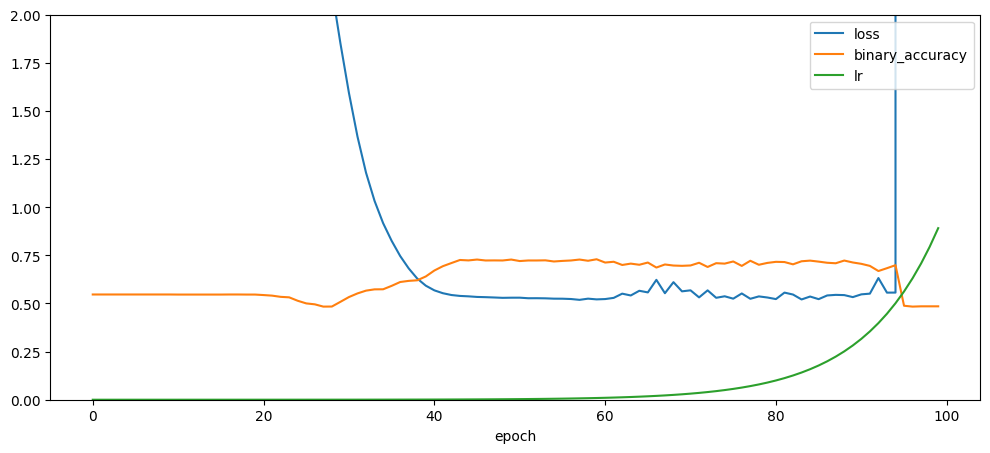

In [86]:
pd.DataFrame(history.history).plot(figsize= (12, 5), xlabel= "epoch", ylim = [0, 2])

Text(0.5, 1.0, 'Learning rate vs loss')

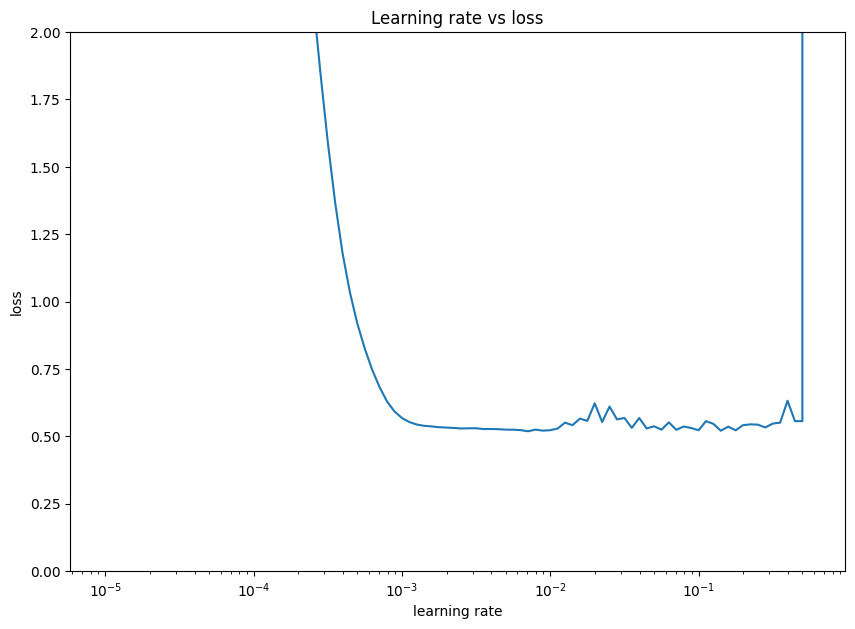

In [87]:
# plot perbandingan learningrate dengan loss
learning_rate_schedule= 1e-5 * 10**(np.arange(100)/20)
plt.figure(figsize= (10, 7))
plt.semilogx(learning_rate_schedule, history.history["loss"]) # Dengan demikan learningrate akan diterapkan log-scale
plt.ylim([0, 2])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("Learning rate vs loss")

In [88]:
tf.random.set_seed(42)

model_15_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation= "LeakyReLU"),
    tf.keras.layers.Dense(3, activation= "sigmoid" )
])

model_15_1.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.SGD(learning_rate= 7e-3),
                metrics= [tf.keras.metrics.binary_accuracy])


model_15_1.fit(X_train, Y_train, epochs=100, verbose= 1)

Epoch 1/100
29/29 [==============================] - 1s 4ms/step - loss: 1.4578 - binary_accuracy: 0.5600
Epoch 2/100
29/29 [==============================] - 0s 3ms/step - loss: 0.6120 - binary_accuracy: 0.6915
Epoch 3/100
29/29 [==============================] - 0s 3ms/step - loss: 0.5940 - binary_accuracy: 0.6996
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5875 - binary_accuracy: 0.6996
Epoch 5/100
29/29 [==============================] - 0s 3ms/step - loss: 0.5803 - binary_accuracy: 0.6978
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5747 - binary_accuracy: 0.7022
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5706 - binary_accuracy: 0.7033
Epoch 8/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5633 - binary_accuracy: 0.7067
Epoch 9/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5616 - binary_accuracy: 0.7052
Epoch 10/100
29/29 [==========================

Modifikasi Layer

In [89]:
tf.random.set_seed(42)

model_15_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation= "LeakyReLU"),
    tf.keras.layers.Dense(50, activation= "tanh"),
    tf.keras.layers.Dense(50, activation= "tanh"),
    tf.keras.layers.Dense(10, activation= "LeakyReLU"),

    tf.keras.layers.Dense(3, activation= "sigmoid" )
])

model_15_1.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.SGD(learning_rate= 7e-3),
                metrics= [tf.keras.metrics.binary_accuracy])


model_15_1.fit(X_train, Y_train, epochs=20, verbose= 1)

Epoch 1/20
29/29 [==============================] - 1s 3ms/step - loss: 0.5979 - binary_accuracy: 0.6841
Epoch 2/20
29/29 [==============================] - 0s 3ms/step - loss: 0.5602 - binary_accuracy: 0.7274
Epoch 3/20
29/29 [==============================] - 0s 3ms/step - loss: 0.5522 - binary_accuracy: 0.7304
Epoch 4/20
29/29 [==============================] - 0s 3ms/step - loss: 0.5481 - binary_accuracy: 0.7296
Epoch 5/20
29/29 [==============================] - 0s 3ms/step - loss: 0.5436 - binary_accuracy: 0.7300
Epoch 6/20
29/29 [==============================] - 0s 3ms/step - loss: 0.5395 - binary_accuracy: 0.7359
Epoch 7/20
29/29 [==============================] - 0s 3ms/step - loss: 0.5363 - binary_accuracy: 0.7363
Epoch 8/20
29/29 [==============================] - 0s 3ms/step - loss: 0.5336 - binary_accuracy: 0.7341
Epoch 9/20
29/29 [==============================] - 0s 2ms/step - loss: 0.5307 - binary_accuracy: 0.7356
Epoch 10/20
29/29 [==============================] - 0s

In [90]:
model_15_1.summary()

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_138 (Dense)           (None, 100)               300       
                                                                 
 dense_139 (Dense)           (None, 50)                5050      
                                                                 
 dense_140 (Dense)           (None, 50)                2550      
                                                                 
 dense_141 (Dense)           (None, 10)                510       
                                                                 
 dense_142 (Dense)           (None, 3)                 33        
                                                                 
Total params: 8443 (32.98 KB)
Trainable params: 8443 (32.98 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [91]:
model_15_1.evaluate(X_test, Y_test)

4/4 [==============================] - 0s 6ms/step - loss: 0.5079 - binary_accuracy: 0.7333


[0.5079039931297302, 0.7333333492279053]

In [ ]:
result = model_15_1.predict(X_test)
conv_result = (result >= 0.5).astype(int)
conv_result

In [ ]:
Y_test

In [95]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report

In [96]:
cm = multilabel_confusion_matrix(Y_test, conv_result)
print("Confusion Matrix:")
print(cm)
print(classification_report(Y_test, conv_result))

Confusion Matrix:
[[[49 15]
  [ 1 35]]

 [[14 28]
  [ 3 55]]

 [[20 24]
  [ 9 47]]]
              precision    recall  f1-score   support

           0       0.70      0.97      0.81        36
           1       0.66      0.95      0.78        58
           2       0.66      0.84      0.74        56

   micro avg       0.67      0.91      0.77       150
   macro avg       0.67      0.92      0.78       150
weighted avg       0.67      0.91      0.77       150
 samples avg       0.69      0.77      0.71       150



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Coba menggunakan paramter binary_accuracy

In [97]:
tf.random.set_seed(42)

model_15_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation= "LeakyReLU"),
    tf.keras.layers.Dense(50, activation= "tanh"),
    tf.keras.layers.Dense(50, activation= "tanh"),
    tf.keras.layers.Dense(10, activation= "LeakyReLU"),

    tf.keras.layers.Dense(3, activation= "sigmoid" )
])

model_15_2.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.SGD(learning_rate= 7e-3),
                metrics= [tf.keras.metrics.BinaryAccuracy(name="binary_accuracy", dtype=None, threshold=0.5)])


model_15_2.fit(X_train, Y_train, epochs=20, verbose= 1)

Epoch 1/20
29/29 [==============================] - 2s 8ms/step - loss: 0.6295 - binary_accuracy: 0.5822
Epoch 2/20
29/29 [==============================] - 0s 6ms/step - loss: 0.5875 - binary_accuracy: 0.6959
Epoch 3/20
29/29 [==============================] - 0s 7ms/step - loss: 0.5708 - binary_accuracy: 0.7319
Epoch 4/20
29/29 [==============================] - 0s 6ms/step - loss: 0.5616 - binary_accuracy: 0.7352
Epoch 5/20
29/29 [==============================] - 0s 6ms/step - loss: 0.5514 - binary_accuracy: 0.7326
Epoch 6/20
29/29 [==============================] - 0s 6ms/step - loss: 0.5438 - binary_accuracy: 0.7374
Epoch 7/20
29/29 [==============================] - 0s 6ms/step - loss: 0.5373 - binary_accuracy: 0.7363
Epoch 8/20
29/29 [==============================] - 0s 6ms/step - loss: 0.5307 - binary_accuracy: 0.7315
Epoch 9/20
29/29 [==============================] - 0s 5ms/step - loss: 0.5267 - binary_accuracy: 0.7374
Epoch 10/20
29/29 [==============================] - 0s

In [100]:
result = model_15_2.predict(X_test)
conv_result = (result >= 0.5).astype(int)


4/4 [==============================] - 1s 14ms/step


In [101]:
cm = multilabel_confusion_matrix(Y_test, conv_result)
print("Confusion Matrix:")
print(cm)
print(classification_report(Y_test, conv_result))

Confusion Matrix:
[[[49 15]
  [ 1 35]]

 [[18 24]
  [ 6 52]]

 [[21 23]
  [10 46]]]
              precision    recall  f1-score   support

           0       0.70      0.97      0.81        36
           1       0.68      0.90      0.78        58
           2       0.67      0.82      0.74        56

   micro avg       0.68      0.89      0.77       150
   macro avg       0.68      0.90      0.78       150
weighted avg       0.68      0.89      0.77       150
 samples avg       0.70      0.76      0.70       150



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
